# INDICE

# 1. EDA
# 2. LIMPIEZA
####   A) ANALISIS, LIMPIEZA Y REESTRUCTURACION DE VARIABLES CATEGORICAS
####   B) ELIMINACION DE COLUMNAS
####   C) IMPUTACION DE VALORES
# 3. FEATURE ENGINEERING
####   A) TIEMPO
####   B) PCA
####   C) UNDERSAMPLING
# 4. MODELOS
#### A) GAUSSIAN
#### B) LOGISTICA
#### C) BernoulliNB
#### D) Decision Tree Classifier
#### E) Random forest
#### F) Extra Trees Classifier
#### G) AdaBoost Classifier
# 5. CONCLUSIONES
----------------------------------------------------------------------------------------------------------------------------

# 1. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Dataset_despegar.csv", delimiter= ",")
df.head()

id  AfsScore  DeviceMatch  FactorCodes  FirstEncounter  IcAddress  \
0   0      99.0            0            0               0          0   
1   2      33.0            0            1               0          1   
2   3      29.0            1            1               1          2   
3   4      46.0            1            2               2          2   
4   5      25.0            2            3               0          2   

   IcInternet  IcSuspicious  IcVelocity  Icidentity  ...  online_queries  \
0           0             0           0           0  ...               0   
1           0             0           1           1  ...               1   
2           1             1           1           2  ...               2   
3           0             0           2           2  ...               3   
4           2             2           3           1  ...               4   

   online_state_bond  paymentsCardType paymentsInstallments  \
0                  0                AX                    1   
1                  1                VI                    2   
2                  2                DC                    4   
3                  2                VI                    1   
4                  2                VI                    4   

                                 same_field_features speed_to_departure  \
0  {u'same_phone': {}, u'same_ip': {}, u'same_doc...              147.7   
1  {u'same_phone': {u'cancelled_counter': 1, u'ca...                0.4   
2  {u'same_phone': {}, u'same_ip': {}, u'same_doc...                0.5   
3  {"same_card":{"issued_min_days":20,"issued_cou...                0.5   
4  {u'same_phone': {}, u'same_ip': {u'issued_coun...                3.9   

   totalUsdAmount  triangulation_height  triangulation_height_speed  \
0          1797.0               2778.47                        53.4   
1           245.0                  7.85                         0.3   
2           370.0                  2.05                         0.1   
3           141.0                 85.55                         0.1   
4           413.0               7136.20                         3.4   

   trip_distance  
0         9931.5  
1         1470.8  
2         2102.7  
3          673.7  
4          838.3  

[5 rows x 93 columns]

In [3]:
df.shape

(40308, 93)

In [4]:
df.isnull().sum().sum()

317368

In [5]:
df.loc[: , "fraud"]

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
40303    0.0
40304    1.0
40305    0.0
40306    0.0
40307    0.0
Name: fraud, Length: 40308, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40308 entries, 0 to 40307
Data columns (total 93 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              40308 non-null  int64  
 1   AfsScore                        40226 non-null  float64
 2   DeviceMatch                     40308 non-null  int64  
 3   FactorCodes                     40308 non-null  int64  
 4   FirstEncounter                  40308 non-null  int64  
 5   IcAddress                       40308 non-null  int64  
 6   IcInternet                      40308 non-null  int64  
 7   IcSuspicious                    40308 non-null  int64  
 8   IcVelocity                      40308 non-null  int64  
 9   Icidentity                      40308 non-null  int64  
 10  IpRoutingMethod                 40308 non-null  int64  
 11  ReasonCode                      40268 non-null  float64
 12  TimeOnPage                      

# VISUALIZACION DE DENSIDAD

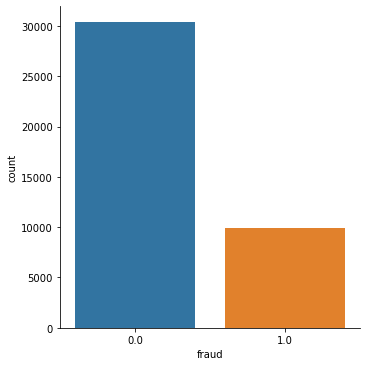

In [7]:
sns.catplot('fraud',data=df,kind="count")

<AxesSubplot:>

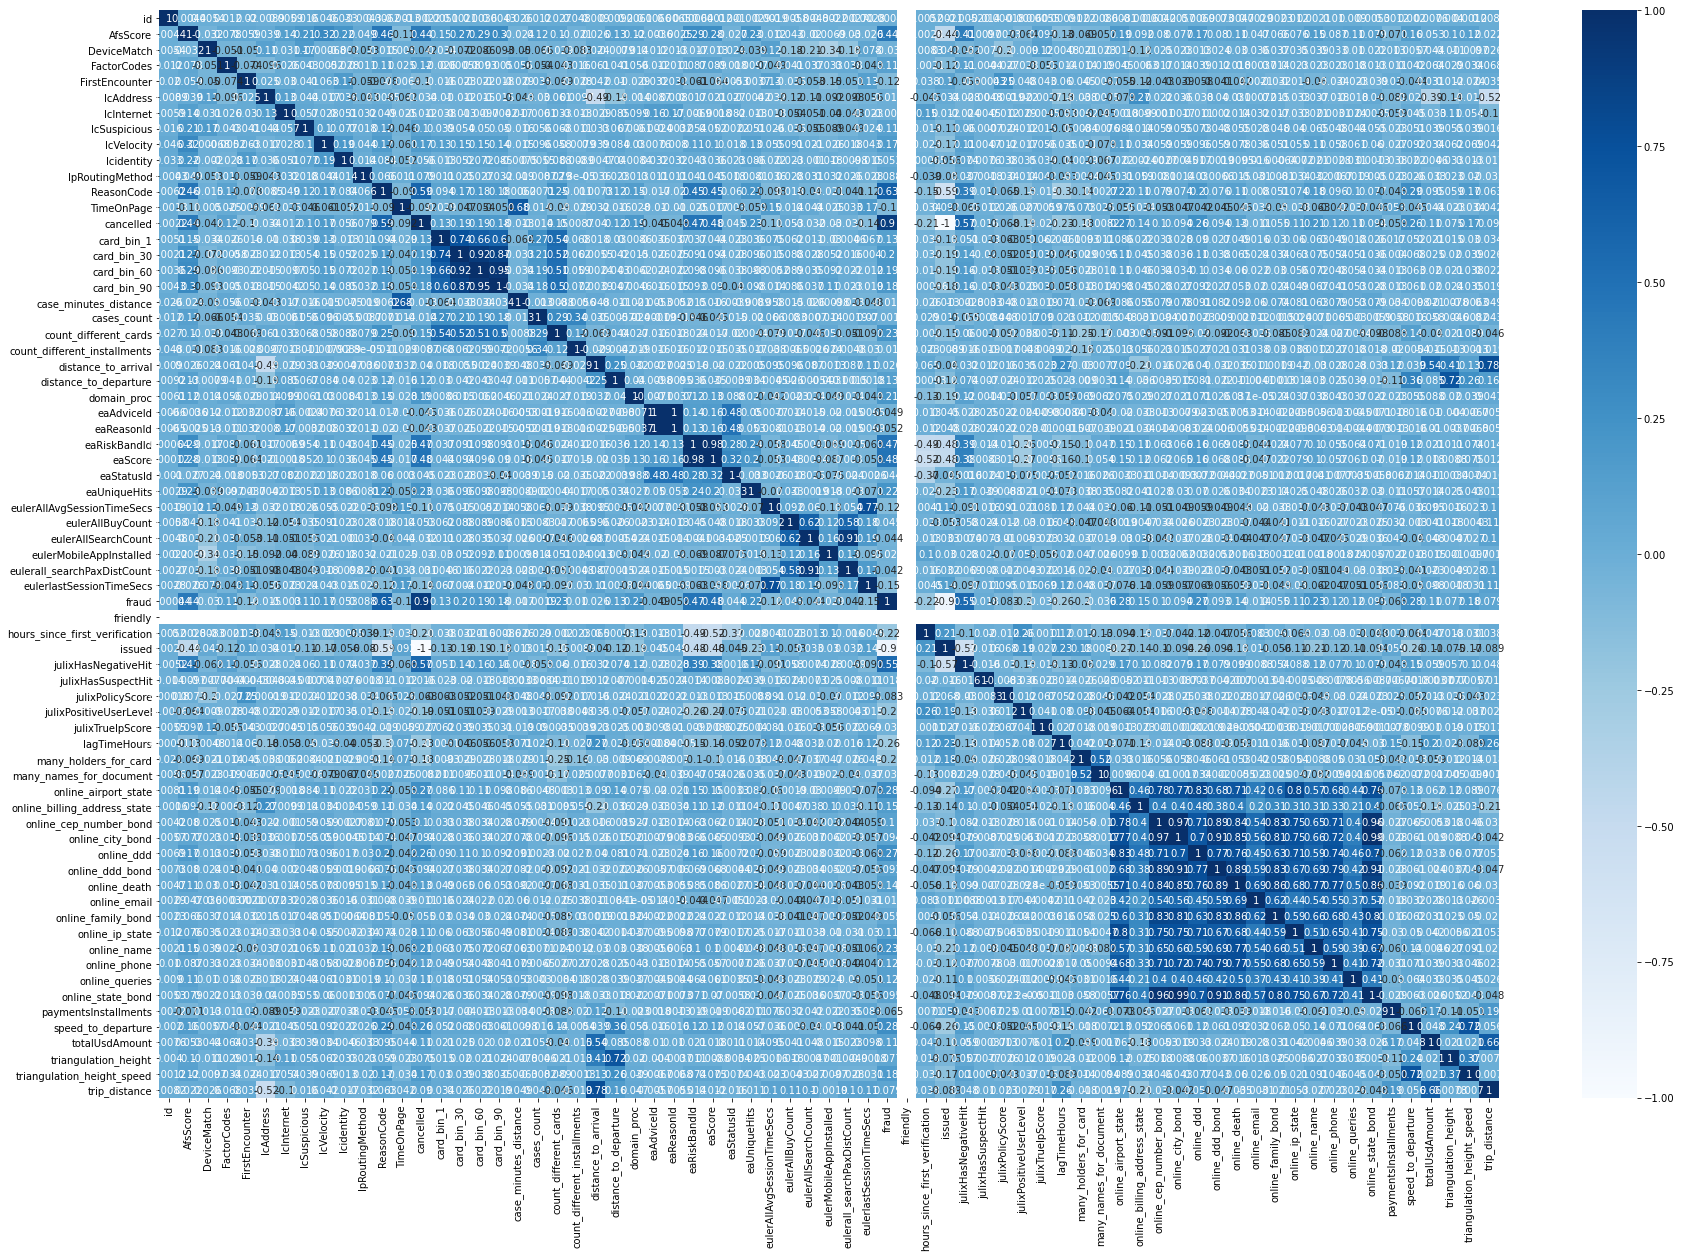

In [8]:
fig, ax= plt.subplots(figsize= (30,20))
sns.heatmap(data= df.loc[:, df.dtypes != object].corr(), ax= ax, annot= True, vmin= -1, cmap= "Blues")

#### Al ser imposible visualizar la correlacion entre las variables de todo el dataset, lo que proponemos hacer es dividir el dataset en 3 y ver la relacion que tienen con la variable target

In [9]:
df_1de3 = df.loc[:,df.dtypes != object].iloc[:,0:23]
df_1de3.head()

id  AfsScore  DeviceMatch  FactorCodes  FirstEncounter  IcAddress  \
0   0      99.0            0            0               0          0   
1   2      33.0            0            1               0          1   
2   3      29.0            1            1               1          2   
3   4      46.0            1            2               2          2   
4   5      25.0            2            3               0          2   

   IcInternet  IcSuspicious  IcVelocity  Icidentity  ...  cancelled  \
0           0             0           0           0  ...          1   
1           0             0           1           1  ...          0   
2           1             1           1           2  ...          0   
3           0             0           2           2  ...          0   
4           2             2           3           1  ...          0   

   card_bin_1  card_bin_30  card_bin_60  card_bin_90  case_minutes_distance  \
0         1.0          4.0          4.0          5.0                    NaN   
1         2.0          2.0          2.0          2.0                    NaN   
2         1.0          1.0          1.0          1.0                    NaN   
3         NaN          NaN          NaN          NaN                    NaN   
4         1.0          1.0          1.0          1.0                    NaN   

   cases_count  count_different_cards  count_different_installments  \
0          1.0                    NaN                           NaN   
1          1.0                    NaN                           NaN   
2          1.0                    NaN                           NaN   
3          1.0                    NaN                           NaN   
4          1.0                    NaN                           NaN   

   distance_to_arrival  
0               3924.0  
1               1478.5  
2               2117.8  
3                355.9  
4               8693.0  

[5 rows x 23 columns]

In [10]:
df_2de3 = df.loc[:,df.dtypes != object].iloc[:,23:46]
df_2de3.head()

distance_to_departure  domain_proc  eaAdviceId  eaReasonId  eaRiskBandId  \
0                 7680.8       0.0123         1.0        63.0           5.0   
1                   10.9       0.0123         3.0        14.0           2.0   
2                   15.2       0.0000         4.0        28.0           3.0   
3                  339.2          NaN         3.0        11.0           1.0   
4                 8243.0          NaN         3.0        25.0           2.0   

   eaScore  eaStatusId  eaUniqueHits  eulerAllAvgSessionTimeSecs  \
0    890.0         2.0           1.0                         NaN   
1    119.0         2.0           1.0                      2129.0   
2    499.0         2.0           2.0                      1311.0   
3     50.0         2.0           1.0                       550.0   
4    275.0         2.0           1.0                       280.0   

   eulerAllBuyCount  ...  eulerlastSessionTimeSecs  fraud  friendly  \
0               NaN  ...                       NaN    1.0         0   
1               5.0  ...                    2326.0    0.0         0   
2               1.0  ...                    1311.0    0.0         0   
3               1.0  ...                     550.0    0.0         0   
4               1.0  ...                     841.0    0.0         0   

   hours_since_first_verification  issued  julixHasNegativeHit  \
0                          3192.0       0                  1.0   
1                         28288.0       1                  0.0   
2                            78.0       1                  0.0   
3                             NaN       1                  0.0   
4                             0.0       1                  0.0   

   julixHasSuspectHit  julixPolicyScore  julixPositiveUserLevel  \
0                 0.0             -10.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0             -20.0                     3.0   
3                 0.0             -10.0                     4.0   
4                 0.0             -20.0                     3.0   

   julixTrueIpScore  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4              14.0  

[5 rows x 23 columns]

In [11]:
df_3de3 = df.loc[:,df.dtypes != object].iloc[:,46:69]
df_3de3.head()

lagTimeHours  many_holders_for_card  many_names_for_document  \
0            52                    NaN                      NaN   
1            27                    NaN                      NaN   
2            34                    NaN                      NaN   
3           662                    NaN                      NaN   
4          2112                    NaN                      NaN   

   online_airport_state  online_billing_address_state  online_cep_number_bond  \
0                     0                             0                       0   
1                     0                             1                       1   
2                     0                             1                       2   
3                     0                             1                       2   
4                     0                             1                       2   

   online_city_bond  online_ddd  online_ddd_bond  online_death  ...  \
0                 0           0                0             0  ...   
1                 1           1                1             1  ...   
2                 2           0                2             1  ...   
3                 2           1                2             1  ...   
4                 2           0                2             1  ...   

   online_name  online_phone  online_queries  online_state_bond  \
0            0             0               0                  0   
1            1             1               1                  1   
2            1             1               2                  2   
3            1             1               3                  2   
4            1             1               4                  2   

   paymentsInstallments  speed_to_departure  totalUsdAmount  \
0                     1               147.7          1797.0   
1                     2                 0.4           245.0   
2                     4                 0.5           370.0   
3                     1                 0.5           141.0   
4                     4                 3.9           413.0   

   triangulation_height  triangulation_height_speed  trip_distance  
0               2778.47                        53.4         9931.5  
1                  7.85                         0.3         1470.8  
2                  2.05                         0.1         2102.7  
3                 85.55                         0.1          673.7  
4               7136.20                         3.4          838.3  

[5 rows x 23 columns]

In [12]:
df_merge_fraud = df.loc[: , "fraud"]
df_merge_fraud

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
40303    0.0
40304    1.0
40305    0.0
40306    0.0
40307    0.0
Name: fraud, Length: 40308, dtype: float64

### Hago merge de la columna fraud con los distintos datasets

<AxesSubplot:>

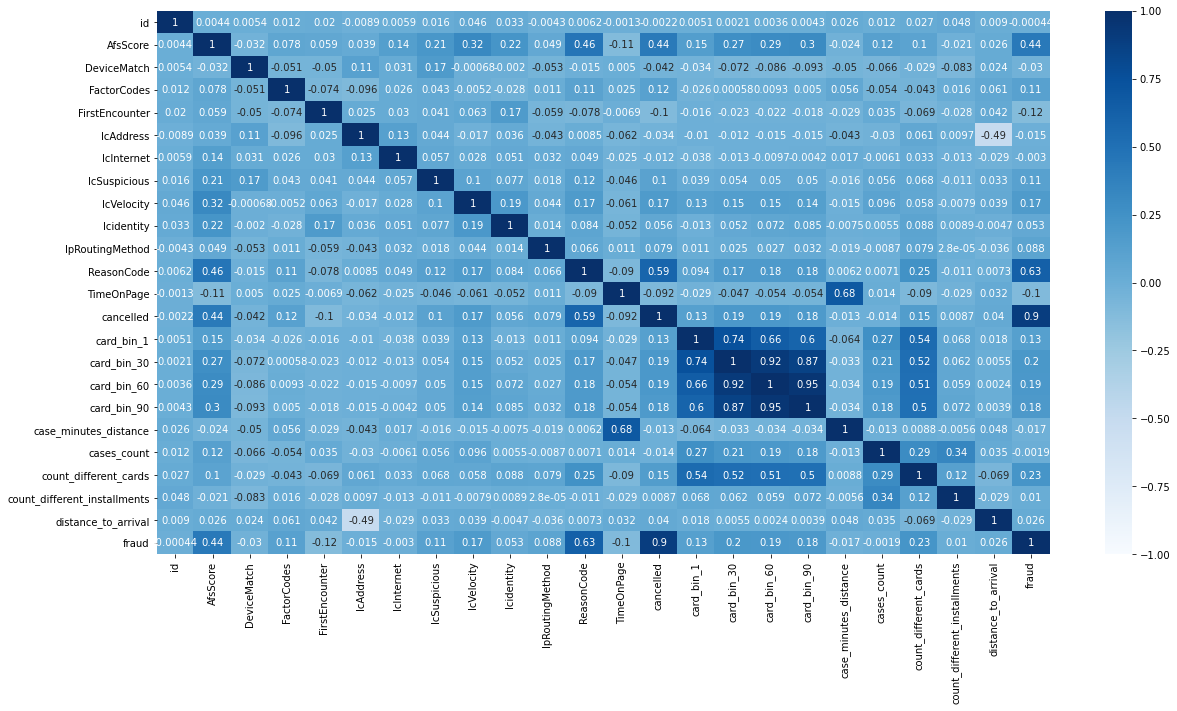

In [13]:
df_merge_1 = pd.merge(df_1de3, df_merge_fraud, left_index=True, right_index=True)
fig, ax= plt.subplots(figsize = (20,10))
sns.heatmap(data= df_merge_1.corr(), annot= True, ax= ax, vmin= -1, cmap= "Blues" )

In [14]:
df_merge_3 = pd.merge(df_3de3, df_merge_fraud, left_index=True, right_index=True)
df_merge_3.head()

lagTimeHours  many_holders_for_card  many_names_for_document  \
0            52                    NaN                      NaN   
1            27                    NaN                      NaN   
2            34                    NaN                      NaN   
3           662                    NaN                      NaN   
4          2112                    NaN                      NaN   

   online_airport_state  online_billing_address_state  online_cep_number_bond  \
0                     0                             0                       0   
1                     0                             1                       1   
2                     0                             1                       2   
3                     0                             1                       2   
4                     0                             1                       2   

   online_city_bond  online_ddd  online_ddd_bond  online_death  ...  \
0                 0           0                0             0  ...   
1                 1           1                1             1  ...   
2                 2           0                2             1  ...   
3                 2           1                2             1  ...   
4                 2           0                2             1  ...   

   online_phone  online_queries  online_state_bond  paymentsInstallments  \
0             0               0                  0                     1   
1             1               1                  1                     2   
2             1               2                  2                     4   
3             1               3                  2                     1   
4             1               4                  2                     4   

   speed_to_departure  totalUsdAmount  triangulation_height  \
0               147.7          1797.0               2778.47   
1                 0.4           245.0                  7.85   
2                 0.5           370.0                  2.05   
3                 0.5           141.0                 85.55   
4                 3.9           413.0               7136.20   

   triangulation_height_speed  trip_distance  fraud  
0                        53.4         9931.5    1.0  
1                         0.3         1470.8    0.0  
2                         0.1         2102.7    0.0  
3                         0.1          673.7    0.0  
4                         3.4          838.3    0.0  

[5 rows x 24 columns]

<AxesSubplot:>

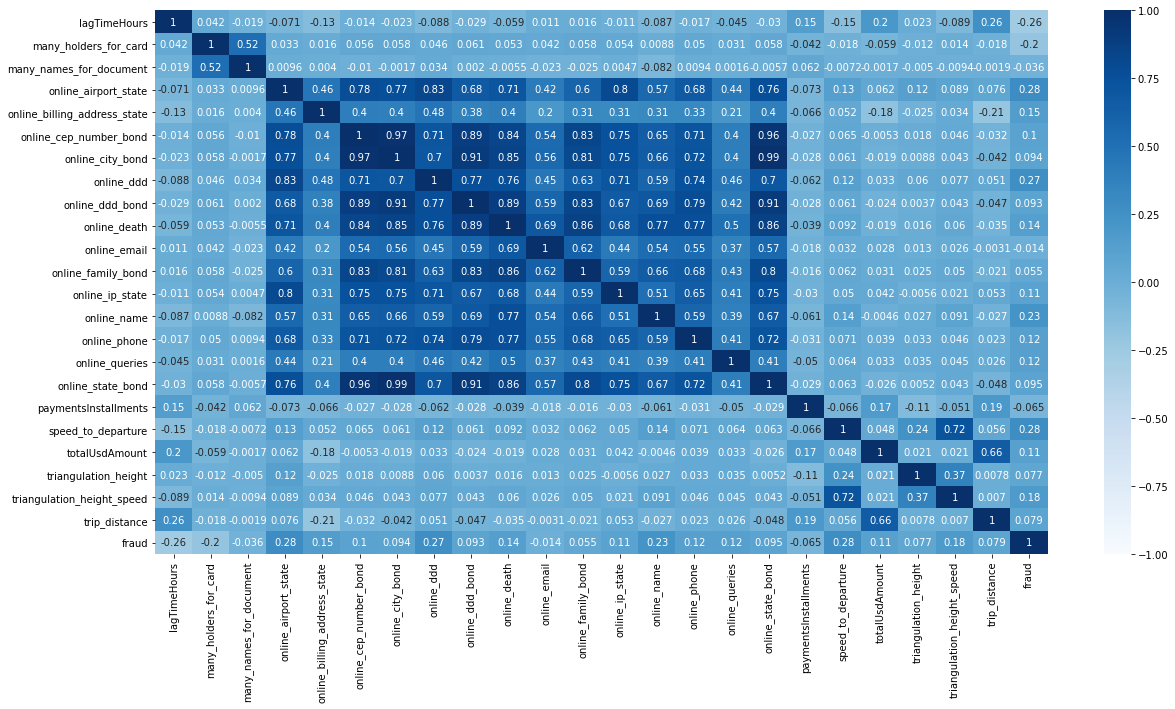

In [15]:
fig, ax= plt.subplots(figsize = (20,10))
sns.heatmap(data= df_merge_3.corr(), annot= True, ax= ax, vmin= -1, cmap= "Blues" )

<AxesSubplot:>

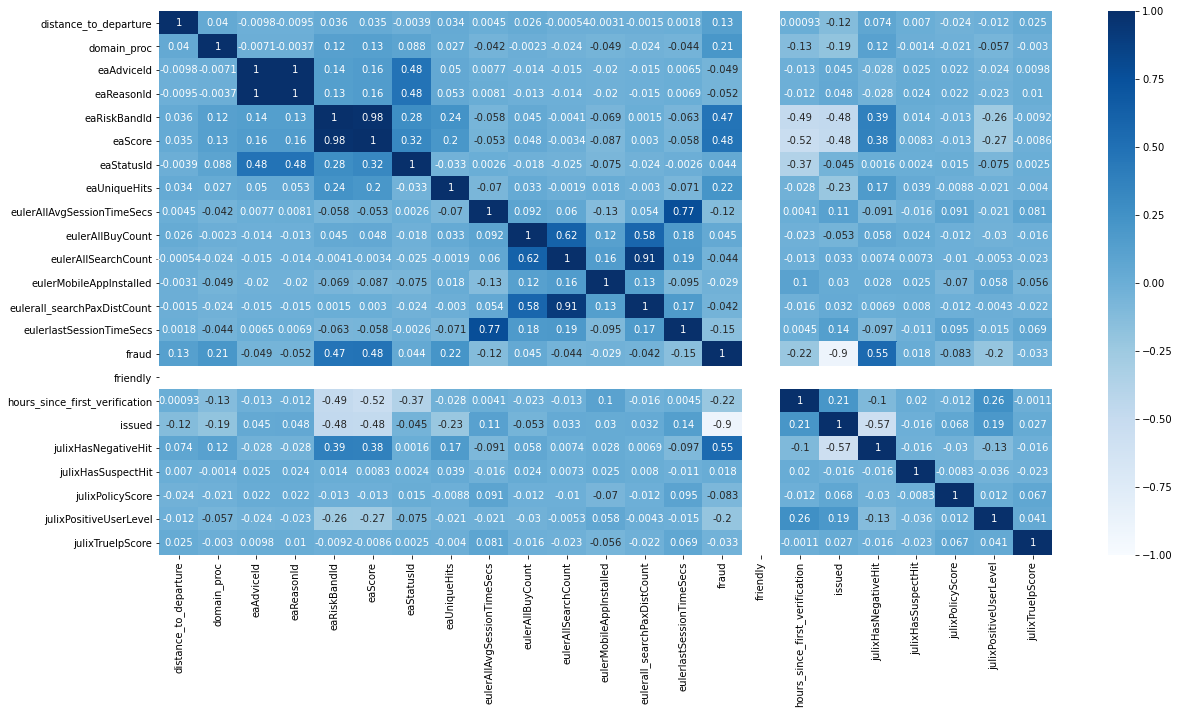

In [16]:
fig, ax= plt.subplots(figsize = (20,10))
sns.heatmap(data= df_2de3.corr(), annot= True, ax= ax, vmin= -1, cmap= "Blues" )

In [17]:
df.friendly.value_counts()
#vemos que es una constante por lo que no nos aporta ningun dato, procedemos a eliminarla
df.drop(columns= "friendly", inplace= True)

--------------------------------------------------------------------------------------------------------------------------------

# 2.A. ANALISIS, LIMPIEZA Y REESTRUCTURACION DE VARIABLES CATEGORICAS

In [18]:
df_object = df.loc[:,df.dtypes == object]
df_object.sample(5)

billingCountryCode cardCountryCode              caseDate      channel  \
3215                  BR              BR  2017-03-26T15:45:07Z         site   
28614                NaN              BR  2017-03-04T03:59:23Z  android-app   
34439                 BR              BR  2017-07-09T18:58:17Z         site   
15027                 BR              BR  2017-06-12T03:15:54Z  android-app   
27686                NaN              BR  2017-03-08T08:57:29Z         site   

      countryCode countryFrom countryTo eaFirstVerificationDate eulerBadge  \
3215           BR          BR        BR    2017-03-18T17:47:45Z    CHECKER   
28614          BR          BR        BR    2016-12-07T20:33:46Z      BUYER   
34439          BR          BR        BR    2011-04-09T21:00:00Z      BUYER   
15027          BR          BR        BR    2012-08-08T07:00:00Z    CHECKER   
27686          BR          PT        BR    2011-06-11T07:00:00Z      BUYER   

      eulerBuyPaxDist  ... iataFrom iataTo ip_city julixBrowserLanguage  \
3215            1|0|0  ...      SDU    VIX     AR5           pt-BR,pt;q   
28614           1|0|0  ...      BEL    GRU     SAO                  NaN   
34439           1|1|0  ...      THE    GRU   HXBBC           pt-BR,pt;q   
15027           2|0|0  ...      IGU    NAT     IGU                  NaN   
27686           1|0|0  ...      LIS    GIG   JKTBQ           pt-BR,pt;q   

       julixOs      julixReasonCode   julixTrueIpCity julixTrueIpRegion  \
3215   Windows                  NaN             belem              para   
28614  Android  Javascript_Disabled    rio de janeiro    rio de janeiro   
34439  Windows  Javascript_Disabled  massape do piaui             piaui   
15027  Android  Javascript_Disabled     foz do iguacu            parana   
27686  Windows       Flash_Disabled            lisboa            lisboa   

      paymentsCardType                                same_field_features  
3215                CA  {u'same_phone': {}, u'same_ip': {}, u'same_doc...  
28614               CA  {u'same_phone': {u'fraud_min_days': 310, u'can...  
34439               VI  {u'same_phone': {u'issued_counter': 1, u'issue...  
15027               VI  {u'same_phone': {}, u'same_ip': {}, u'same_doc...  
27686               CA  {u'same_phone': {}, u'same_ip': {}, u'same_doc...  

[5 rows x 24 columns]

In [19]:
df_object.columns

Index(['billingCountryCode', 'cardCountryCode', 'caseDate', 'channel',
       'countryCode', 'countryFrom', 'countryTo', 'eaFirstVerificationDate',
       'eulerBadge', 'eulerBuyPaxDist', 'eulerBuyTripType', 'eulerFriendsIds',
       'eulerSearchUrgency', 'eulerSocialNetwork', 'iataFrom', 'iataTo',
       'ip_city', 'julixBrowserLanguage', 'julixOs', 'julixReasonCode',
       'julixTrueIpCity', 'julixTrueIpRegion', 'paymentsCardType',
       'same_field_features'],
      dtype='object')

In [20]:
df_object.drop(columns = ["same_field_features", "caseDate", "eaFirstVerificationDate", "eulerFriendsIds"], inplace= True, axis= 1)

In [21]:
df_object.columns

Index(['billingCountryCode', 'cardCountryCode', 'channel', 'countryCode',
       'countryFrom', 'countryTo', 'eulerBadge', 'eulerBuyPaxDist',
       'eulerBuyTripType', 'eulerSearchUrgency', 'eulerSocialNetwork',
       'iataFrom', 'iataTo', 'ip_city', 'julixBrowserLanguage', 'julixOs',
       'julixReasonCode', 'julixTrueIpCity', 'julixTrueIpRegion',
       'paymentsCardType'],
      dtype='object')

In [22]:
df_eda= df_object
df_eda["fraud"]= df.loc[: , "fraud"]
df_eda.shape

(40308, 21)

In [23]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40308 entries, 0 to 40307
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   billingCountryCode    31012 non-null  object 
 1   cardCountryCode       40278 non-null  object 
 2   channel               40308 non-null  object 
 3   countryCode           40308 non-null  object 
 4   countryFrom           40308 non-null  object 
 5   countryTo             40307 non-null  object 
 6   eulerBadge            37657 non-null  object 
 7   eulerBuyPaxDist       38947 non-null  object 
 8   eulerBuyTripType      38952 non-null  object 
 9   eulerSearchUrgency    37378 non-null  object 
 10  eulerSocialNetwork    24253 non-null  object 
 11  iataFrom              40308 non-null  object 
 12  iataTo                40308 non-null  object 
 13  ip_city               39995 non-null  object 
 14  julixBrowserLanguage  35660 non-null  object 
 15  julixOs            

In [24]:
df_object.shape

(40308, 21)

### Analizamos las variables categoricas una por una.
De esta manera podemos agrupar aquellas variables de las cuales poseamos pocas muestras en una sola.

In [25]:
df_object.cardCountryCode.value_counts()

BR    39062
US      341
CO      204
MX       81
AR       63
      ...  
GR        1
CZ        1
CY        1
MW        1
FI        1
Name: cardCountryCode, Length: 63, dtype: int64

In [26]:
df_object.loc[df_object.cardCountryCode != "BR", "cardCountryCode"] = "Otros"

In [27]:
df_object.billingCountryCode.value_counts(normalize= True).head()

BR    0.992841
US    0.002322
AR    0.000516
FR    0.000451
MX    0.000322
Name: billingCountryCode, dtype: float64

In [28]:
df_object.loc[df_object.billingCountryCode != "BR", "billingCountryCode"] = "Otros"

In [29]:
indices_channel = df_object.groupby("channel").count().loc[df_object.channel.value_counts() < 1000].index
indices_channel

Index(['b2b', 'flights-partner', 'mobile-app', 'netpoints-br',
       'travel-agency-api', 'travel-agency-bo', 'travel-agency-whitelabel',
       'voos.com'],
      dtype='object', name='channel')

In [30]:
df_object["channel"].replace(['b2b', 'flights-partner', 'mobile-app', 'netpoints-br',
       'travel-agency-api', 'travel-agency-bo', 'travel-agency-whitelabel',
       'voos.com'], "otros", inplace= True)

In [31]:
df_object.channel.value_counts()

site               25213
site-smartphone     5165
iphone-app          4102
android-app         4066
site-tablet         1178
otros                584
Name: channel, dtype: int64

In [32]:
print(df_object.countryCode.value_counts())
#Como es una constante eliminaremos esta columna
df_object.drop(columns= "countryCode", axis= 1, inplace= True)

BR    40308
Name: countryCode, dtype: int64


In [33]:
print(df_object.countryFrom.value_counts(normalize= True).head(15))
#lo divividiremos en 2, brasil y otros
df_object.loc[df_object.countryFrom != "BR", "countryFrom"] = "otros"

BR    0.951052
US    0.008286
ES    0.004590
PT    0.004366
AR    0.003597
IT    0.003424
CO    0.003324
FR    0.002655
GB    0.001910
DE    0.001836
CA    0.001489
PE    0.001315
NL    0.000992
MX    0.000918
BO    0.000794
Name: countryFrom, dtype: float64


In [34]:
print(df_object.countryTo.value_counts(normalize= True).head(15))
#Esta vez voy a dividirlo en 3, BR, US Y otros
df_object.loc[(df_object.countryTo != "BR") & (df_object.countryTo != "US"), "countryTo"] = "otros"

BR    0.832362
US    0.041109
AR    0.016077
PT    0.013745
ES    0.011437
IT    0.007294
FR    0.006475
CL    0.006475
GB    0.006351
CO    0.006252
CA    0.005781
MX    0.005657
PE    0.005235
DE    0.003870
NL    0.003027
Name: countryTo, dtype: float64


In [35]:
df_object.countryTo.value_counts()

BR       33550
otros     5101
US        1657
Name: countryTo, dtype: int64

In [36]:
df_object.eulerBadge.value_counts()
#no hace falta modificar los tags

BUYER      23097
CHECKER    14137
VISITOR      423
Name: eulerBadge, dtype: int64

In [37]:
print(df_object.eulerBuyPaxDist.value_counts(normalize= True).head())
#dividimos nuevamente en 3
df_object.loc[(df_object.eulerBuyPaxDist != "1|0|0") & (df_object.eulerBuyPaxDist != "2|0|0"), "eulerBuyPaxDist"] = "otros"

1|0|0    0.678692
2|0|0    0.206614
3|0|0    0.030195
2|1|0    0.017639
1|1|0    0.016792
Name: eulerBuyPaxDist, dtype: float64


In [38]:
df_object.eulerBuyTripType.value_counts(normalize= True)
#dividimos en 5
df_object.loc[(df_object.eulerBuyTripType == "roundtrip")|(df_object.eulerBuyTripType == "RoundTrip")|(df_object.eulerBuyTripType == "ROUND_TRIP") , "eulerBuyTripType"] = "ROUNDTRIP"
df_object.loc[(df_object.eulerBuyTripType == "one_way")|(df_object.eulerBuyTripType == "ONE_WAY "), "eulerBuyTripType"] = "ONEWAY"
df_object.loc[(df_object.eulerBuyTripType != "ROUNDTRIP") & (df_object.eulerBuyTripType != "ONEWAY"), "eulerBuyTripType"] = "otros"

In [39]:
df_object.eulerBuyTripType.value_counts(normalize= True)

ROUNDTRIP    0.514612
ONEWAY       0.424829
otros        0.060559
Name: eulerBuyTripType, dtype: float64

In [40]:
df_object.eulerSearchUrgency.value_counts()
#no hace falta modificar los tags

INACTIVE    21644
URGENT      14227
ACTIVE       1507
Name: eulerSearchUrgency, dtype: int64

In [41]:
df_object.eulerSocialNetwork.value_counts()

DESPEGAR    20610
FACEBOOK     2466
GOOGLE       1177
Name: eulerSocialNetwork, dtype: int64

In [42]:
df_object.iataFrom.value_counts(normalize=True).head(10)

GRU    0.187878
GIG    0.083284
CGH    0.064454
SSA    0.050189
BSB    0.045425
POA    0.044879
SDU    0.043242
CNF    0.035973
REC    0.035427
CWB    0.033318
Name: iataFrom, dtype: float64

In [43]:
#quiero seleccionar los que son mayores que 0.03 y que no sean GRU para agruparlos
df_object.groupby("iataFrom").sum().loc[(df_object.iataFrom.value_counts(normalize=True) > 0.03) & (df_object.iataFrom.value_counts(normalize= True) < 0.10)].index

Index(['BSB', 'CGH', 'CNF', 'CWB', 'FOR', 'GIG', 'POA', 'REC', 'SDU', 'SSA'], dtype='object', name='iataFrom')

In [44]:
df_object["iataFrom"].replace(['BSB', 'CGH', 'CNF', 'CWB', 'FOR', 'GIG', 'POA', 'REC', 'SDU', 'SSA'], "otros_mayores", inplace= True)

In [45]:
df_object.loc[(df_object.iataFrom != "GRU") & (df_object.iataFrom != "otros_mayores"), "iataFrom"] = "otros_menores"

In [46]:
df_object.iataFrom.value_counts()

otros_mayores    18878
otros_menores    13857
GRU               7573
Name: iataFrom, dtype: int64

In [47]:
df_object.iataTo.value_counts(normalize= True).head(20)

GRU    0.113575
CGH    0.062196
GIG    0.057358
BSB    0.049246
SSA    0.047162
SDU    0.045500
FOR    0.038255
REC    0.037437
POA    0.035452
CNF    0.033567
CWB    0.028605
VCP    0.023320
GYN    0.021311
FLN    0.021212
BEL    0.013174
CGB    0.013149
VIX    0.012504
MCZ    0.012256
NAT    0.011611
LIS    0.011363
Name: iataTo, dtype: float64

In [48]:
df_object.groupby("iataTo").sum().loc[(df_object.iataTo.value_counts(normalize=True) > 0.028) & (df_object.iataTo.value_counts(normalize= True) < 0.10)].index

Index(['BSB', 'CGH', 'CNF', 'CWB', 'FOR', 'GIG', 'POA', 'REC', 'SDU', 'SSA'], dtype='object', name='iataTo')

In [49]:
df_object["iataTo"].replace(['BSB', 'CGH', 'CNF', 'CWB', 'FOR', 'GIG', 'POA', 'REC', 'SDU', 'SSA'], "otros_mayores", inplace= True)

df_object.loc[(df_object.iataTo != "GRU") & (df_object.iataTo != "otros_mayores"), "iataTo"] = "otros_menores"

print(df_object.iataTo.value_counts(normalize= True))

otros_menores    0.451647
otros_mayores    0.434777
GRU              0.113575
Name: iataTo, dtype: float64


In [50]:
df_object.ip_city.value_counts(normalize= True).head(10)

SAO    0.216202
RIO    0.098637
BSB    0.043205
SSA    0.042605
BHZ    0.030754
SJ1    0.026728
GYN    0.023378
REC    0.021378
POA    0.020778
BEL    0.013727
Name: ip_city, dtype: float64

In [51]:
df_object.loc[(df_object.ip_city != "SAO") & (df_object.ip_city != "RIO") & 
              (df_object.ip_city != "BSB") & (df_object.ip_city != "SSA") & 
              (df_object.ip_city != "BHZ"), "ip_city"] = "otros"
df_object.ip_city.value_counts()

otros    23054
SAO       8647
RIO       3945
BSB       1728
SSA       1704
BHZ       1230
Name: ip_city, dtype: int64

In [52]:
df_object.julixBrowserLanguage.value_counts(normalize= True)

pt-BR,pt;q          0.652412
pt-br               0.226921
en-US,en;q          0.044840
pt-BR               0.031268
en-us               0.014610
                      ...   
ko-KR               0.000028
en-us,en-securid    0.000028
en-CA,en-GB;q       0.000028
es-PY,es;q          0.000028
en-us,en            0.000028
Name: julixBrowserLanguage, Length: 112, dtype: float64

In [53]:
df_object.loc[(df_object.julixBrowserLanguage != "pt-BR,pt;q") & (df_object.julixBrowserLanguage != "pt-br"), "julixBrowserLanguage"] = "otros"
df_object.julixBrowserLanguage.value_counts()

pt-BR,pt;q    23265
otros          8951
pt-br          8092
Name: julixBrowserLanguage, dtype: int64

In [54]:
df_object.julixOs.value_counts(normalize= True)

Windows           0.562859
iOS               0.194014
Android           0.168815
OS X              0.054828
Unknown           0.014399
Linux             0.004682
Other             0.000252
Windows Mobile    0.000126
Windows NT 6.1    0.000025
Name: julixOs, dtype: float64

In [55]:
df_object.loc[(df_object.julixOs != "Windows") & (df_object.julixOs != "iOS") & 
              (df_object.julixOs != "Android") & (df_object.julixOs != "OS X"), "julixOs"]= "otros"
df_object.julixOs.value_counts(normalize= True)

Windows    0.554704
iOS        0.191203
Android    0.166369
OS X       0.054034
otros      0.033691
Name: julixOs, dtype: float64

In [56]:
df_object.julixReasonCode.value_counts(normalize= True)

Flash_Disabled                  0.582228
Javascript_Disabled             0.381667
INVALID_account_address_zip     0.016781
3 IPs Same Device per Day       0.005873
Cookies_Disabled                0.003409
3 Emails Same Device per Day    0.003278
IP in Global Threat List        0.002203
Time Zone/True Geo Mismatch     0.001521
ScreenResolutionAnomaly         0.000944
Anonymous Proxy                 0.000682
Hidden Proxy                    0.000577
Transparent Proxy               0.000472
Email in Global Black List      0.000131
Proxy Geo/True Geo Mismatch     0.000105
Call Center Order               0.000105
Potential Cookie Wiping         0.000026
Name: julixReasonCode, dtype: float64

In [57]:
df_object.loc[(df_object.julixReasonCode != "Flash_Disabled") & (df_object.julixReasonCode != "Javascript_Disabled"), "julixReasonCode"] = "otros"
df_object.julixReasonCode.value_counts()

Flash_Disabled         22205
Javascript_Disabled    14556
otros                   3547
Name: julixReasonCode, dtype: int64

In [58]:
df_object.julixTrueIpCity.value_counts(normalize= True).head(10)

sao paulo         0.205644
rio de janeiro    0.183006
curitiba          0.042763
fortaleza         0.038753
brasilia          0.033348
salvador          0.030353
belo horizonte    0.029795
campinas          0.015430
goiania           0.015202
porto alegre      0.013908
Name: julixTrueIpCity, dtype: float64

In [59]:
df_object.loc[(df_object.julixTrueIpCity != "sao paulo") & (df_object.julixTrueIpCity != "rio de janeiro") & 
              (df_object.julixTrueIpCity != "curitiba") & (df_object.julixTrueIpCity != "fortaleza") & 
              (df_object.julixTrueIpCity != "brasilia"), "julixTrueIpCity"] = "otros"
df_object.julixTrueIpCity.value_counts()

otros             20468
sao paulo          8103
rio de janeiro     7211
curitiba           1685
fortaleza          1527
brasilia           1314
Name: julixTrueIpCity, dtype: int64

In [60]:
(df_object.julixTrueIpRegion.value_counts(normalize= True) > 0.01) & ((df_object.julixTrueIpRegion.value_counts(normalize= True) < 0.10))

sao paulo                       False
rio de janeiro                  False
parana                           True
minas gerais                     True
ceara                            True
                                ...  
madeira                         False
asturias                        False
bristol                         False
bath and north east somerset    False
kansas                          False
Name: julixTrueIpRegion, Length: 233, dtype: bool

In [61]:
df_object.groupby("julixTrueIpRegion").sum().loc[(df_object.julixTrueIpRegion.value_counts(normalize= True) > 0.01) & ((df_object.julixTrueIpRegion.value_counts(normalize= True) < 0.10))].index

Index(['bahia', 'ceara', 'distrito federal', 'espirito santo', 'goias',
       'minas gerais', 'parana', 'pernambuco', 'rio grande do sul',
       'santa catarina'],
      dtype='object', name='julixTrueIpRegion')

In [62]:
df_object["julixTrueIpRegion"].replace(['bahia', 'ceara', 'distrito federal', 'espirito santo', 'goias',
       'minas gerais', 'parana', 'pernambuco', 'rio grande do sul',
       'santa catarina'], "mid_otros", inplace = True)

In [63]:
df_object.loc[(df_object.julixTrueIpRegion != "sao paulo") & (df_object.julixTrueIpRegion != "rio de janeiro") & 
              (df_object.julixTrueIpRegion != "mid_otros"), "julixTrueIpRegion"] = "otros_chicos"

In [64]:
df_object.julixTrueIpRegion.value_counts()

mid_otros         14631
sao paulo         12723
rio de janeiro     8352
otros_chicos       4602
Name: julixTrueIpRegion, dtype: int64

In [65]:
df_object.paymentsCardType.value_counts()

CA    18802
VI    18458
AX     1451
HC      942
EC      518
DC      122
VD        1
Name: paymentsCardType, dtype: int64

In [66]:
df_dummies = pd.get_dummies(data= df_object)

In [67]:
df_dummies1 = df_dummies.iloc[:, 0:34]
df_dummies2 = df_dummies.iloc[:, 35:70]

In [68]:
df_merge_dummies1 = pd.merge(df_dummies1 , df_merge_fraud, left_index=True, right_index=True)
df_merge_dummies2 = pd.merge(df_dummies2 , df_merge_fraud, left_index=True, right_index=True)

<AxesSubplot:>

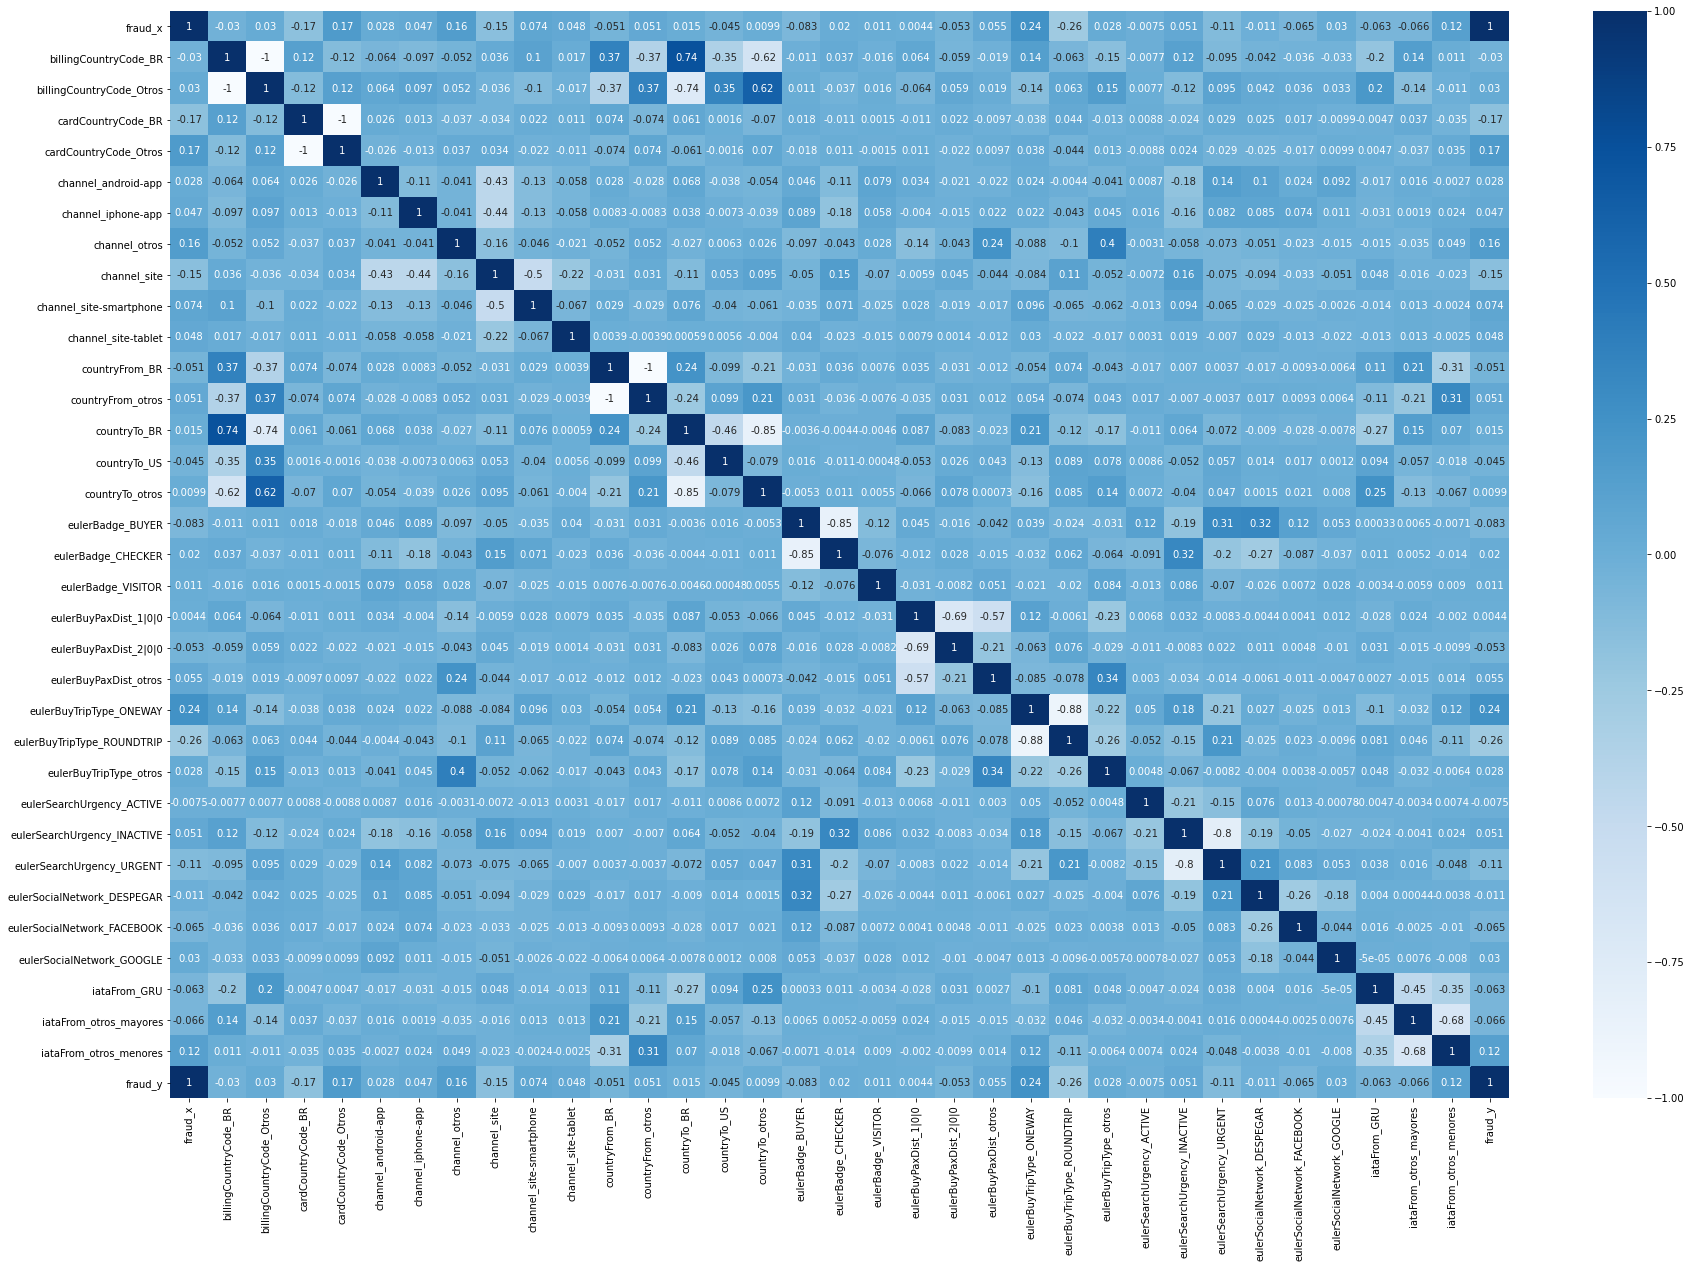

In [69]:
fig, ax = plt.subplots(figsize= (30,20))
sns.heatmap(df_merge_dummies1.corr(), annot= True, ax = ax, cmap= "Blues", vmin= -1)

<AxesSubplot:>

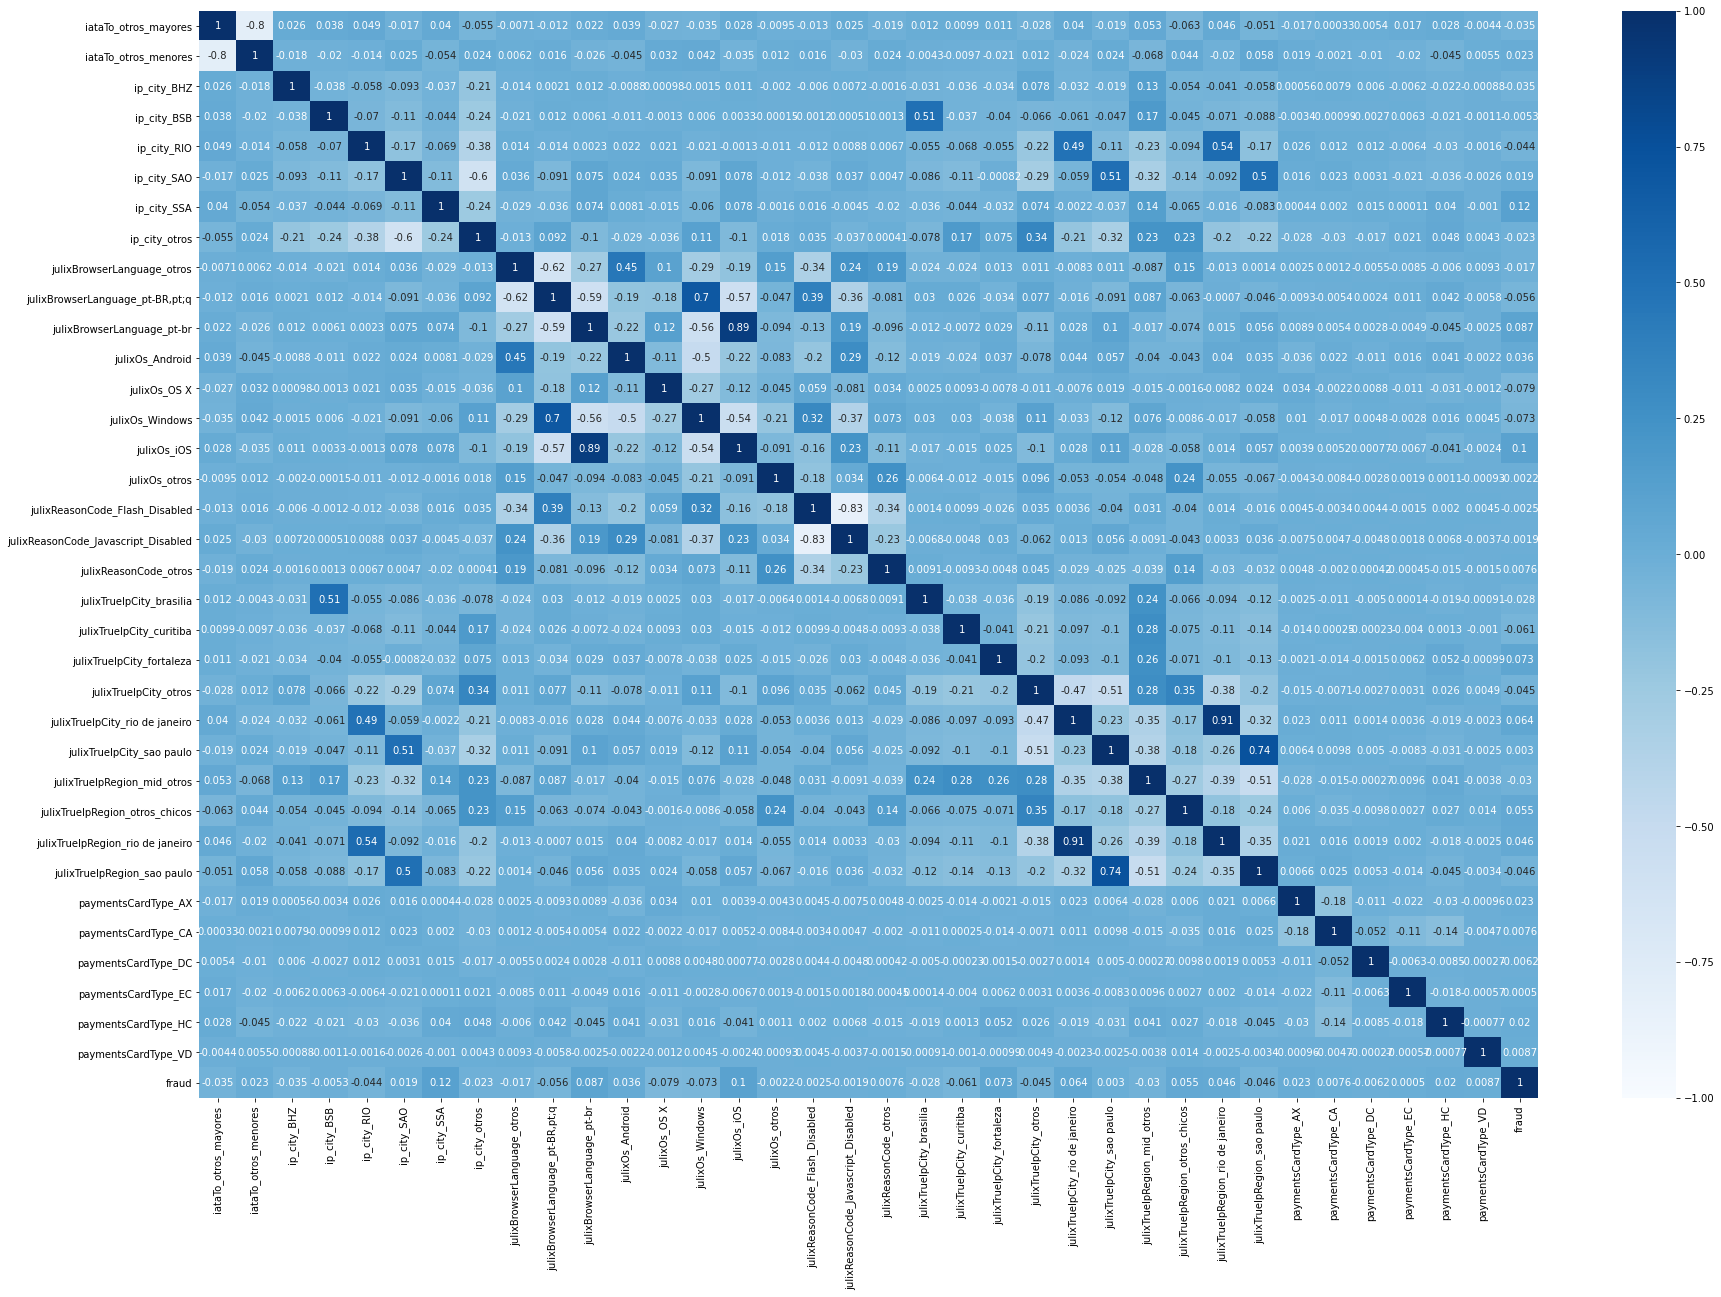

In [70]:
fig, ax = plt.subplots(figsize= (30,20))
sns.heatmap(df_merge_dummies2.corr(), annot= True, ax = ax, cmap= "Blues", vmin= -1)

# UNIFICACION!!
#### Es hora de unir el dataframe original con el creado y modificado a partir de las categoricas

In [71]:
#Primero vamos a eliminar las variables categoricas del DataFrame original
df.loc[:,df.dtypes == object].columns

Index(['billingCountryCode', 'cardCountryCode', 'caseDate', 'channel',
       'countryCode', 'countryFrom', 'countryTo', 'eaFirstVerificationDate',
       'eulerBadge', 'eulerBuyPaxDist', 'eulerBuyTripType', 'eulerFriendsIds',
       'eulerSearchUrgency', 'eulerSocialNetwork', 'iataFrom', 'iataTo',
       'ip_city', 'julixBrowserLanguage', 'julixOs', 'julixReasonCode',
       'julixTrueIpCity', 'julixTrueIpRegion', 'paymentsCardType',
       'same_field_features'],
      dtype='object')

In [72]:
df.drop(labels= ['billingCountryCode', 'cardCountryCode', 'channel', 'countryCode',
       'countryFrom', 'countryTo', 'eaFirstVerificationDate', 'eulerBadge',
       'eulerBuyPaxDist', 'eulerBuyTripType', 'eulerFriendsIds',
       'eulerSearchUrgency', 'eulerSocialNetwork', 'iataFrom', 'iataTo',
       'ip_city', 'julixBrowserLanguage', 'julixOs', 'julixReasonCode',
       'julixTrueIpCity', 'julixTrueIpRegion', 'paymentsCardType',
       'same_field_features'], axis= 1, inplace= True)

In [73]:
#ahora si hacemos un merge con las nuevas columnas dummies
df_mergeado = pd.merge(df, df_dummies.drop("fraud", axis=1), left_index=True, right_index=True)
df_mergeado.sample(5)

#ponemos df_dummies.drop("fraud", axis=1) pora que no tengamos la columna fraud dos veces en el mismo dataframe

id  AfsScore  DeviceMatch  FactorCodes  FirstEncounter  IcAddress  \
29944  45179       4.0            0            4               0          0   
11284  17179      34.0            1            1             144          2   
13725  20885      32.0            3            7               0          2   
2710    4039      10.0            0           10               0          0   
32905  49583      32.0            1            1             841          2   

       IcInternet  IcSuspicious  IcVelocity  Icidentity  ...  \
29944           0             0           2           1  ...   
11284           0             6          67           1  ...   
13725           7             0           2          64  ...   
2710            0             0           1           0  ...   
32905           0             6          14           1  ...   

       julixTrueIpRegion_otros_chicos  julixTrueIpRegion_rio de janeiro  \
29944                               1                                 0   
11284                               0                                 0   
13725                               0                                 0   
2710                                0                                 0   
32905                               0                                 0   

       julixTrueIpRegion_sao paulo  paymentsCardType_AX  paymentsCardType_CA  \
29944                            0                    0                    0   
11284                            1                    0                    1   
13725                            1                    0                    1   
2710                             0                    0                    0   
32905                            0                    0                    1   

       paymentsCardType_DC  paymentsCardType_EC  paymentsCardType_HC  \
29944                    0                    0                    0   
11284                    0                    0                    0   
13725                    0                    0                    0   
2710                     0                    0                    1   
32905                    0                    0                    0   

      paymentsCardType_VD  paymentsCardType_VI  
29944                   0                    1  
11284                   0                    0  
13725                   0                    0  
2710                    0                    0  
32905                   0                    0  

[5 rows x 139 columns]

# B. Eliminación de columnas

### Tratamientos de nulos

In [74]:
mascara_nulos= df_mergeado.isnull().sum()>0

In [75]:
df_cols_nulos = df_mergeado.loc[:,mascara_nulos]
df_cols_nulos.head()

AfsScore  ReasonCode  TimeOnPage  card_bin_1  card_bin_30  card_bin_60  \
0      99.0       481.0         NaN         1.0          4.0          4.0   
1      33.0       100.0         NaN         2.0          2.0          2.0   
2      29.0       480.0    433736.0         1.0          1.0          1.0   
3      46.0       100.0    291782.0         NaN          NaN          NaN   
4      25.0       100.0    433112.0         1.0          1.0          1.0   

   card_bin_90  case_minutes_distance  cases_count  count_different_cards  \
0          5.0                    NaN          1.0                    NaN   
1          2.0                    NaN          1.0                    NaN   
2          1.0                    NaN          1.0                    NaN   
3          NaN                    NaN          1.0                    NaN   
4          1.0                    NaN          1.0                    NaN   

   ...  julixHasSuspectHit  julixPolicyScore  julixPositiveUserLevel  \
0  ...                 0.0             -10.0                     0.0   
1  ...                 0.0               0.0                     0.0   
2  ...                 0.0             -20.0                     3.0   
3  ...                 0.0             -10.0                     4.0   
4  ...                 0.0             -20.0                     3.0   

   julixTrueIpScore  many_holders_for_card  many_names_for_document  \
0               0.0                    NaN                      NaN   
1               0.0                    NaN                      NaN   
2               0.0                    NaN                      NaN   
3               0.0                    NaN                      NaN   
4              14.0                    NaN                      NaN   

   speed_to_departure  triangulation_height  triangulation_height_speed  \
0               147.7               2778.47                        53.4   
1                 0.4                  7.85                         0.3   
2                 0.5                  2.05                         0.1   
3                 0.5                 85.55                         0.1   
4                 3.9               7136.20                         3.4   

   trip_distance  
0         9931.5  
1         1470.8  
2         2102.7  
3          673.7  
4          838.3  

[5 rows x 38 columns]

In [76]:
df_cols_nulos.isnull().sum().head()

AfsScore         82
ReasonCode       40
TimeOnPage     9776
card_bin_1     1048
card_bin_30    1048
dtype: int64

In [77]:
#creo este df para mergear el dataframe de nulos con la columna fraud y de esta manera ver si tienen correlacion con si se hace o no fraude.
W = pd.merge(df_cols_nulos , df_merge_fraud, left_index=True, right_index=True)

<AxesSubplot:>

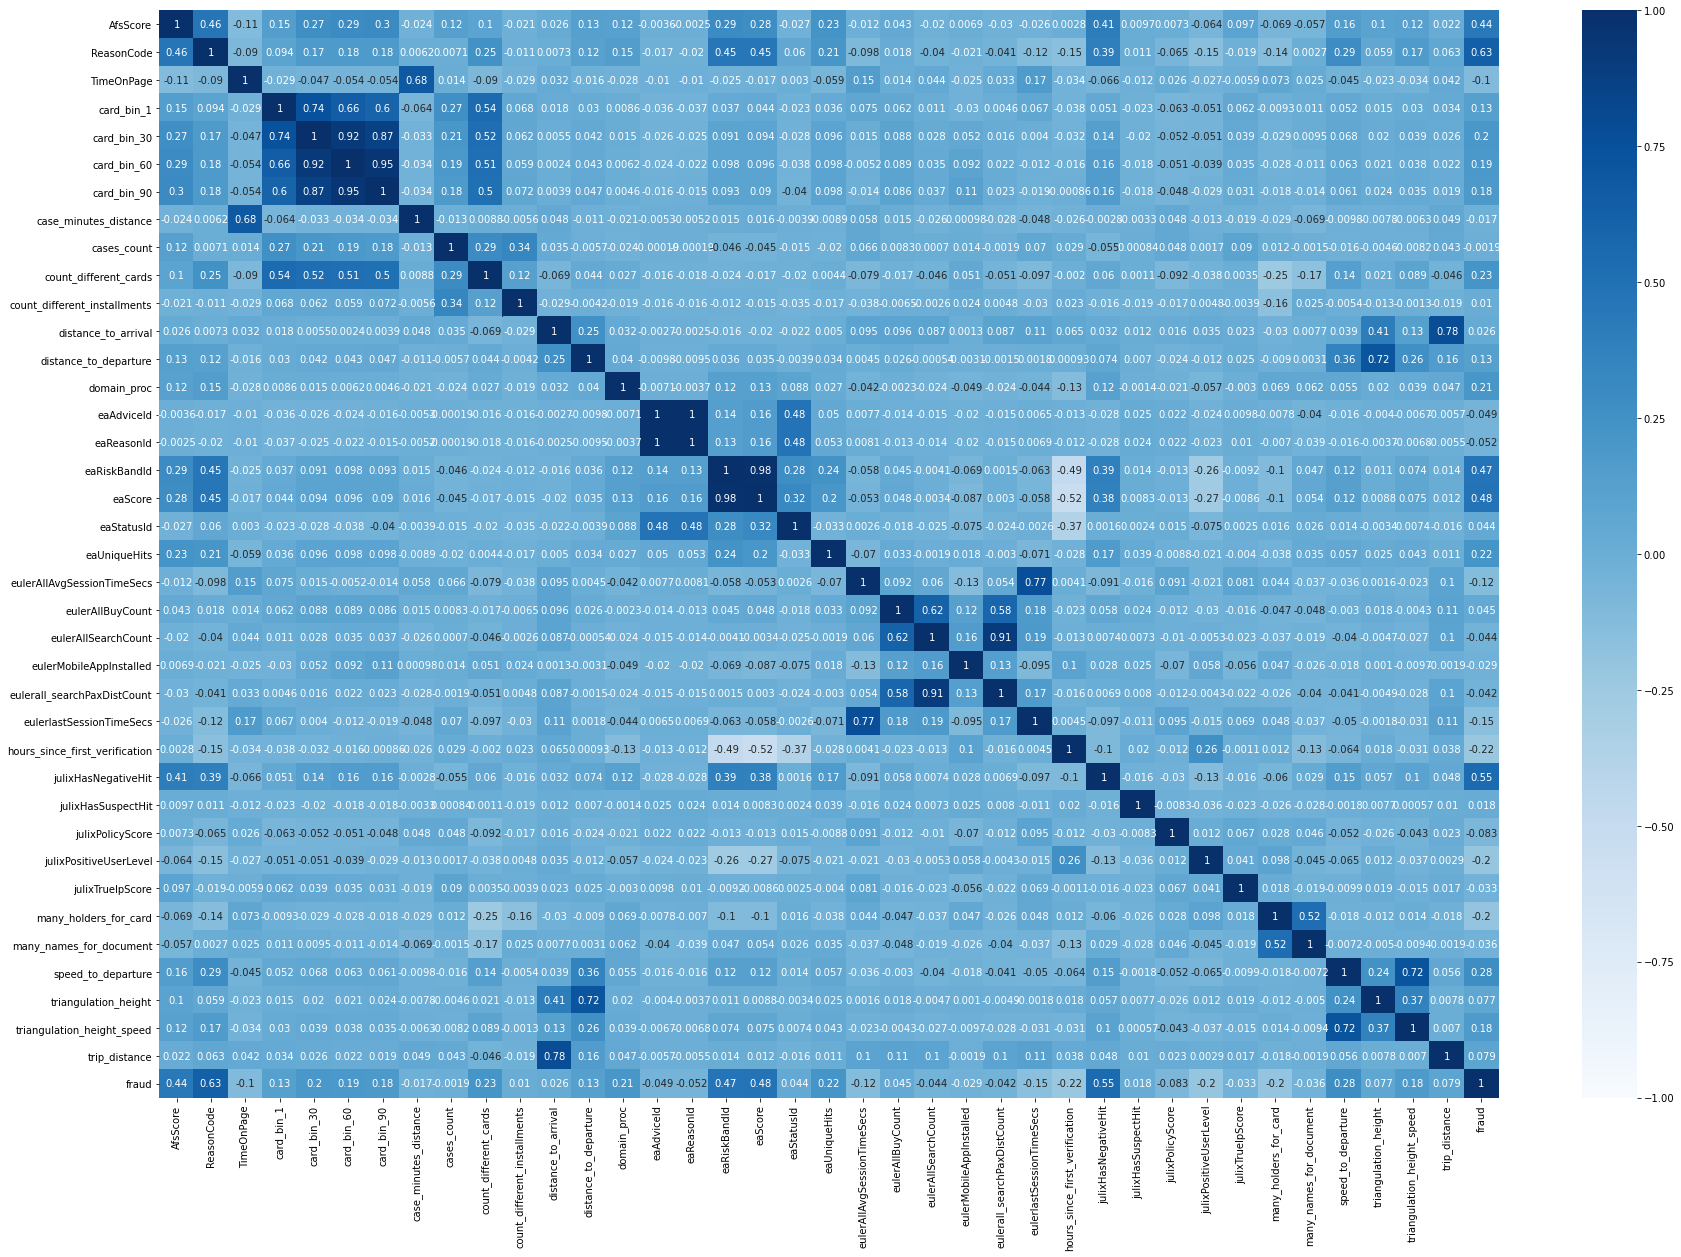

In [78]:
fig, ax = plt.subplots(figsize= (30,20))
sns.heatmap(W.corr(), annot= True, ax = ax, cmap= "Blues", vmin= -1)

In [79]:
# case_minutes_distance, count_different_installments, many_names_for_document tiene 38112 nulos y posee poca correlacion
df_mergeado.drop(["case_minutes_distance","count_different_installments", "many_names_for_document", "count_different_cards", "many_holders_for_card", "domain_proc"], axis=1, inplace= True)

In [80]:
x = df_mergeado.loc[:,mascara_nulos].isnull().sum()
x

AfsScore                            82
ReasonCode                          40
TimeOnPage                        9776
card_bin_1                        1048
card_bin_30                       1048
card_bin_60                       1048
card_bin_90                       1048
cases_count                        388
distance_to_arrival                309
distance_to_departure              309
eaAdviceId                           3
eaReasonId                           3
eaRiskBandId                         2
eaScore                              2
eaStatusId                           3
eaUniqueHits                         2
eulerAllAvgSessionTimeSecs         593
eulerAllBuyCount                   593
eulerAllSearchCount                593
eulerMobileAppInstalled           1231
eulerall_searchPaxDistCount        593
eulerlastSessionTimeSecs           593
hours_since_first_verification    5550
julixHasNegativeHit                 26
julixHasSuspectHit                  26
julixPolicyScore         

# C. IMPUTACION
#### Decidimos remplazar los valores nulos que quedan en las columnas por sus respectivos promedios

In [81]:
df_mergeado.fillna(df_mergeado.mean(), inplace= True)

----------------------------------------------------------------------------------

# 3. Feature enineering

# A.Tiempo
##### Generamos una nueva columna con el dato del mes para visualizar si existe informacion que pueda servir segun en que parte del año se encuentre.

In [82]:
#CONVERTIMOS LA COLUMNA A TIPO DATETIME
df_mergeado["caseDate"] = pd.to_datetime(df_mergeado["caseDate"], format= "%Y-%m-%d")

In [83]:
df_mergeado[["caseDate"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40308 entries, 0 to 40307
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   caseDate  40308 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 315.0 KB


In [84]:
df_mergeado["Mes"] = df_mergeado["caseDate"].dt.strftime("%m")

In [85]:
df_mergeado.drop("caseDate", axis= 1, inplace= True) #borro la columna de la fecha ya que no vamos a extraer mas informacion de ella

In [86]:
df_w_corr = W.corr() 
(df_w_corr.fraud < 0.05) & (df_w_corr.fraud > -0.05)

AfsScore                          False
ReasonCode                        False
TimeOnPage                        False
card_bin_1                        False
card_bin_30                       False
card_bin_60                       False
card_bin_90                       False
case_minutes_distance              True
cases_count                        True
count_different_cards             False
count_different_installments       True
distance_to_arrival                True
distance_to_departure             False
domain_proc                       False
eaAdviceId                         True
eaReasonId                        False
eaRiskBandId                      False
eaScore                           False
eaStatusId                         True
eaUniqueHits                      False
eulerAllAvgSessionTimeSecs        False
eulerAllBuyCount                   True
eulerAllSearchCount                True
eulerMobileAppInstalled            True
eulerall_searchPaxDistCount        True


In [87]:
W.corr().loc[(df_w_corr.fraud < 0.05) & (df_w_corr.fraud > -0.05),"fraud"]

case_minutes_distance          -0.016766
cases_count                    -0.001942
count_different_installments    0.010443
distance_to_arrival             0.025518
eaAdviceId                     -0.048585
eaStatusId                      0.043567
eulerAllBuyCount                0.044616
eulerAllSearchCount            -0.044238
eulerMobileAppInstalled        -0.028914
eulerall_searchPaxDistCount    -0.041849
julixHasSuspectHit              0.017602
julixTrueIpScore               -0.032663
many_names_for_document        -0.036317
Name: fraud, dtype: float64

# B. TIPO DE VUELO

In [88]:
#df["tipo_de_vuelo"] = np.NaN

In [89]:
#for i in range (0, len(df)):
#    if df.loc[i, "countryFrom"] == df.loc[i, "countryTo"]:
#        df.loc[i, "tipo_de_vuelo"] = 0
#    else:
#        df.loc[i, "tipo_de_vuelo"] = 1
        
        

In [90]:
#df.tipo_de_vuelo.value_counts()

# B. PCA (Analisis de Componentes Principales)

In [91]:
#eliminamos la columna id del dataset!
df_mergeado.drop("id", axis=1, inplace= True)

In [92]:
X= df_mergeado.drop("fraud", axis= 1)
y= df_mergeado["fraud"]

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state= 10, test_size=0.3)

In [94]:
from sklearn.pipeline import Pipeline

In [95]:
pasos_pca= [("scaler", StandardScaler()), ("PCA", PCA ())]

In [96]:
pipe_PCA= Pipeline(pasos_pca)
pipe_PCA.fit(Xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA())])

In [97]:
pipe_PCA.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('PCA', PCA())],
 'verbose': False,
 'scaler': StandardScaler(),
 'PCA': PCA(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'PCA__copy': True,
 'PCA__iterated_power': 'auto',
 'PCA__n_components': None,
 'PCA__random_state': None,
 'PCA__svd_solver': 'auto',
 'PCA__tol': 0.0,
 'PCA__whiten': False}

In [98]:
p = pipe_PCA[1].explained_variance_ratio_

In [99]:
p

array([7.70580492e-02, 5.62054943e-02, 4.96798615e-02, 4.16228311e-02,
       2.82407158e-02, 2.80800145e-02, 2.68133374e-02, 2.34768338e-02,
       2.24477813e-02, 2.01941966e-02, 1.82087046e-02, 1.79430865e-02,
       1.74189744e-02, 1.59627023e-02, 1.53869177e-02, 1.48238238e-02,
       1.45497868e-02, 1.42085422e-02, 1.33425987e-02, 1.27118655e-02,
       1.20960843e-02, 1.15495163e-02, 1.12805692e-02, 1.09844550e-02,
       1.07122001e-02, 1.06095926e-02, 1.04291032e-02, 9.89300129e-03,
       9.67886401e-03, 9.27822176e-03, 8.97466566e-03, 8.89566587e-03,
       8.80494290e-03, 8.60845943e-03, 8.49849093e-03, 8.36165106e-03,
       8.15906529e-03, 8.14687656e-03, 8.11066190e-03, 7.93341526e-03,
       7.90241402e-03, 7.80670511e-03, 7.74704320e-03, 7.68846833e-03,
       7.60943924e-03, 7.51102938e-03, 7.46846620e-03, 7.37799983e-03,
       7.31127449e-03, 7.27881620e-03, 7.16806636e-03, 6.95283472e-03,
       6.82075228e-03, 6.70969567e-03, 6.65206263e-03, 6.50004818e-03,
      

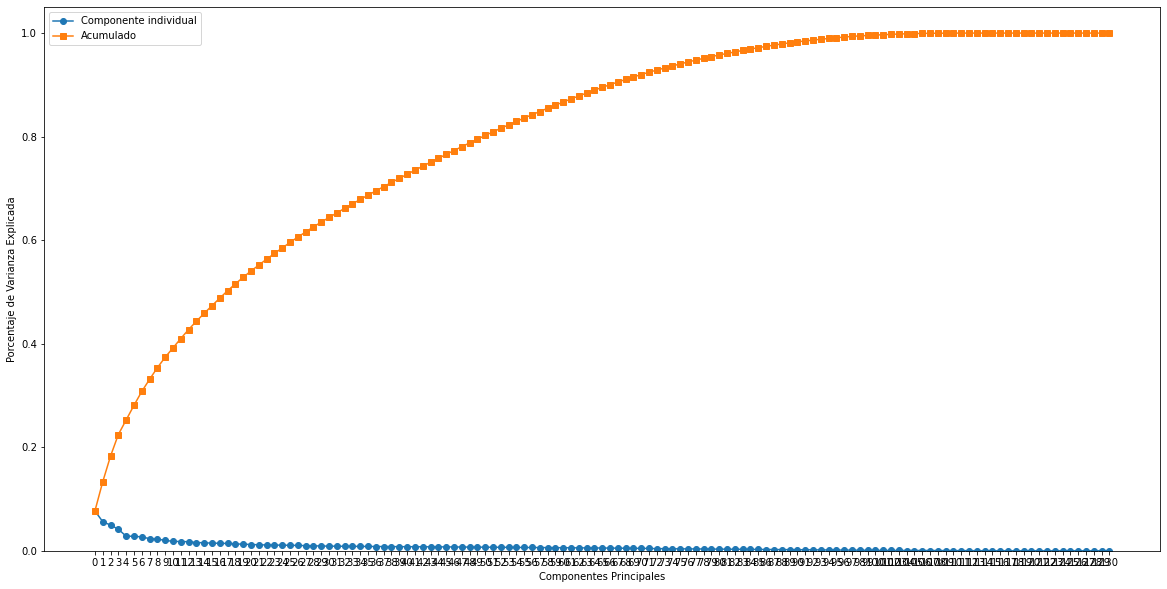

In [101]:
plt.figure(figsize=(20,10))

plt.plot(range(131), p, '-o', label='Componente individual')
plt.plot(range(131), np.cumsum(p), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(0,1.05); plt.xticks(range(131))
plt.legend(loc=0);

el porcentaje maximo de explicacion es =  0.07705804920394838


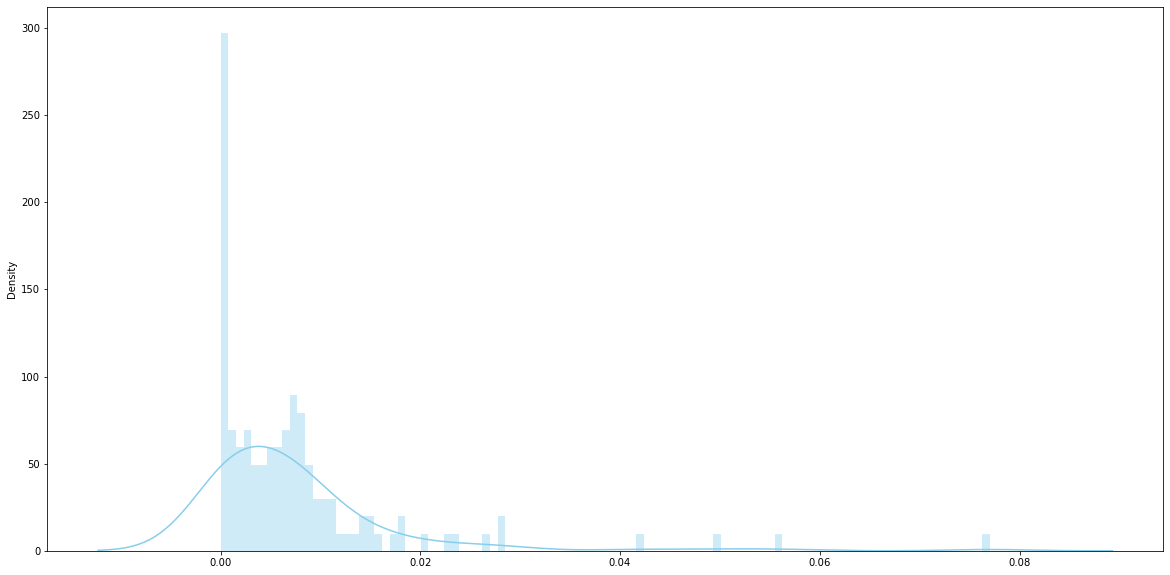

In [102]:
fig, ax= plt.subplots(figsize= (20, 10))
sns.distplot(p, color="skyblue", ax= ax, bins= 100)

print("el porcentaje maximo de explicacion es = ", p.max())

Como se puede apreciar en la distribucion no hay grandes porcentajes en la explicacion

# C. Undersampler
### Como tenemos un Dataset cuya target se encuentra desbalanceada, aplicaremos Undersampler.
### ¿Por que este Undersampler?  porque es un dataset grande y preferimos perder datos de la clase mayoritaria

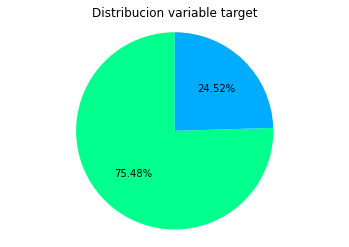

In [103]:
section= df_mergeado.fraud.value_counts()
colors= colors = ['#00FF8D', '#00ACFF']
fig = plt.pie(section, colors=colors,
        startangle=90,
        autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Distribucion variable target')
plt.show()

In [104]:
from imblearn.under_sampling import RandomUnderSampler

Under_sampler = RandomUnderSampler(sampling_strategy= "majority", random_state= 2)

X_Train_Under, y_train_under = Under_sampler.fit_resample(Xtrain, ytrain)

#### Aplicamos PCA pero con el Dataset Desbalanceado con el fin de ver si hay algun cambio

In [105]:
pipe_PCA2 = pipe_PCA
pipe_PCA2.fit(X_Train_Under, y_train_under)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA())])

In [106]:
pipe_PCA2[1].explained_variance_ratio_

array([8.10009192e-02, 5.49112341e-02, 5.04179644e-02, 4.24597353e-02,
       3.01839939e-02, 2.85461835e-02, 2.59858296e-02, 2.27899762e-02,
       2.15386946e-02, 2.02174539e-02, 1.86378631e-02, 1.81554939e-02,
       1.70459786e-02, 1.60277333e-02, 1.58717798e-02, 1.48486277e-02,
       1.43718533e-02, 1.39041814e-02, 1.32958642e-02, 1.29339192e-02,
       1.23581150e-02, 1.15354100e-02, 1.11563264e-02, 1.09562514e-02,
       1.07771908e-02, 1.05112762e-02, 1.03469411e-02, 9.67065291e-03,
       9.58005805e-03, 9.42547594e-03, 9.13027587e-03, 8.96072676e-03,
       8.89205323e-03, 8.65029147e-03, 8.58782737e-03, 8.40958520e-03,
       8.17787284e-03, 8.14874908e-03, 8.10441623e-03, 7.91748079e-03,
       7.83660551e-03, 7.79538149e-03, 7.70177309e-03, 7.62941801e-03,
       7.55711938e-03, 7.50099799e-03, 7.40515059e-03, 7.36068428e-03,
       7.28666364e-03, 7.25529564e-03, 7.12495332e-03, 6.92712652e-03,
       6.74065139e-03, 6.60543776e-03, 6.53484290e-03, 6.41472781e-03,
      

no hay muchos cambios 

-------------------------------------------------------------------------------

In [107]:
df_edasn=df_eda.replace([np.NaN],'nulo')

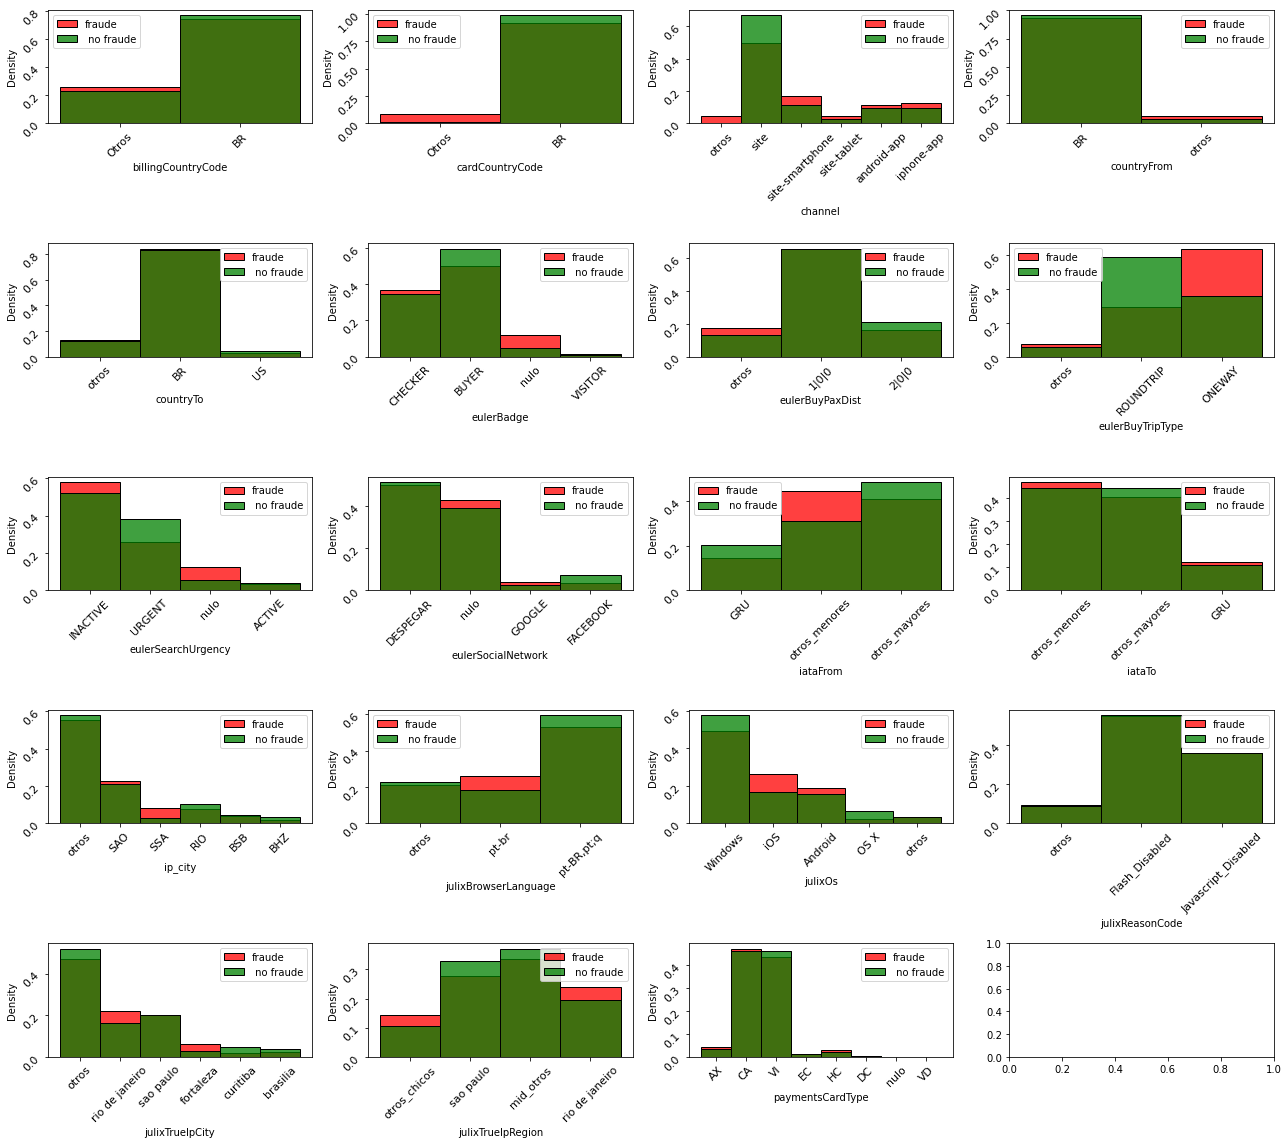

In [108]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(18,16))


for col, ax in zip(df_eda.columns[:-1], axes.flatten()):
    sns.histplot(data = df_edasn.loc[df_edasn['fraud']==1, col], stat = 'density', ax = ax, kde = False, color= 'red' )
    sns.histplot(data = df_edasn.loc[df_edasn['fraud']==0, col], stat = 'density', kde=False, ax=ax, color = 'green')
    ax.legend(['fraude', ' no fraude'])
    ax.tick_params(labelrotation=45,labelsize=11)
    fig.tight_layout()

--------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------

## Funciones que nos van a ayudar a simplificar nuestro trabajo

In [109]:
#funcion para graficar matriz de confunsion
def plot_conf_matrix(y_test, y_prediction, title, normalize=None):
  """
  Grafica la matriz de confusion
  Requiere seaborn, matplotlib y confusion_matrix
  normalize: {‘true’, ‘pred’, ‘all’}, default=None
  """
  if isinstance(normalize, type(None)): 
    fmt=',g'
  else: 
    fmt='.2%'
  conf_matrix = confusion_matrix(y_test, y_prediction, normalize=normalize)
  fig, ax = plt.subplots(figsize=(6, 6))
  sns.heatmap(pd.DataFrame(conf_matrix), annot=True , fmt=fmt, cbar=False, annot_kws={"size": 28}, cmap='Blues')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.ylabel('Valor Verdadero', fontsize=18, y=0.5)
  plt.xlabel('Estimado por el Modelo', fontsize=18)
  ax.tick_params(labelsize=15)
  ax.set_title(title, fontsize=22, pad=21)

In [110]:
#funcion para graficar curva roc
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, f1_score, roc_curve, mean_squared_error

In [112]:
#Funcion para graficar matriz de confusion y los scores
def scores(y_test, ypred, titulo):
    print("")
    print("accuracy_score = ", accuracy_score(y_test, ypred))
    print("precision_score = ", precision_score(y_test, ypred))
    print("recall_score = ", recall_score(y_test, ypred))
    print("f1_score = ", f1_score(y_test, ypred))
    print("mean_squared_error = ", mean_squared_error(y_test, ypred))
    print("")
    confusion_matrix(y_test, ypred)
    plot_conf_matrix(y_test, ypred, titulo)
    

-------------------------------------------------------------------------------------------------------------------------------------

# 4. MODELOS

# A. Gaussian

In [113]:
from sklearn.naive_bayes import GaussianNB

modelo_gaussian= GaussianNB()

modelo_gaussian.fit(Xtrain, ytrain)

y_gaussian_pred= modelo_gaussian.predict(Xtest)


accuracy_score =  0.8662035888530555
precision_score =  0.7412015641663704
recall_score =  0.7008403361344537
f1_score =  0.7204561161022806
mean_squared_error =  0.13379641114694452



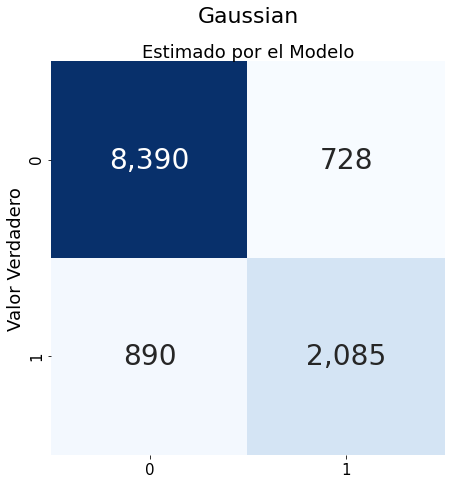

In [114]:
scores(ytest, y_gaussian_pred, "Gaussian")

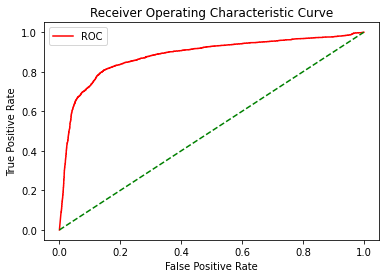

0.8104991327524649


In [116]:
prob = modelo_gaussian.predict_proba(Xtest)[:, 1]
fper, tper, thresholds= roc_curve(ytest, prob)

plot_roc_curve(fper, tper)
print(roc_auc_score(ytest, y_gaussian_pred))

#### No tiene muy buena Perfomance

---------------------------------------------------------------------------------------------------------------------------

# B. REG LOGISTICA

In [117]:
from sklearn.linear_model import LogisticRegressionCV

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Fold= StratifiedKFold(n_splits= 5, shuffle= True, random_state= 2)

In [119]:
pasos_reg_logistica = [("Scaler" , StandardScaler()), ("Logistica", LogisticRegressionCV())]

pipe_logistica= Pipeline(pasos_reg_logistica)

In [120]:
param_grid = {
    'Logistica__penalty' : ['l2', 'l1'],
    'Logistica__solver' : ["lbfgs", "liblinear", "sag", "saga"]}

In [121]:
grid_logistica = GridSearchCV(pipe_logistica, param_grid, cv= Fold, scoring= "accuracy", n_jobs= -1)

In [122]:
grid_logistica.fit(Xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('Logistica', LogisticRegressionCV())]),
             n_jobs=-1,
             param_grid={'Logistica__penalty': ['l2', 'l1'],
                         'Logistica__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [123]:
grid_logistica.best_params_

{'Logistica__penalty': 'l2', 'Logistica__solver': 'lbfgs'}

In [124]:
#apliquemos los best_params en regresion logistica
model_log = LogisticRegressionCV(solver='liblinear')
scaler= StandardScaler()
Xtrain_scaled= scaler.fit_transform(Xtrain)
Xtest_scaled= scaler.transform(Xtest)

model_log.fit(Xtrain_scaled, ytrain)

LogisticRegressionCV(solver='liblinear')

In [125]:
y_pred_log_grid= model_log.predict(Xtest_scaled)


accuracy_score =  0.9752749524518316
precision_score =  0.9854862119013063
recall_score =  0.9129411764705883
f1_score =  0.9478276042575468
mean_squared_error =  0.02472504754816836



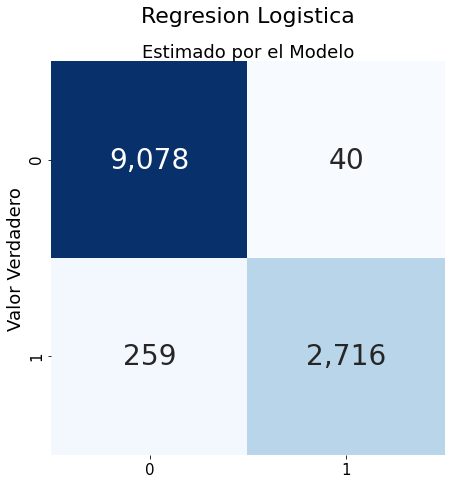

In [126]:
scores(ytest, y_pred_log_grid, "Regresion Logistica")

#### Sin GRID SEARCH

In [127]:
pipe_logistica2= pipe_logistica

pipe_logistica2.fit(Xtrain, ytrain)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Logistica', LogisticRegressionCV())])

In [128]:
y_pred_log_sin_grid = pipe_logistica2.predict(Xtest)

In [129]:
y_pred_proba_log2= pipe_logistica2.predict_proba


accuracy_score =  0.9752749524518316
precision_score =  0.9854862119013063
recall_score =  0.9129411764705883
f1_score =  0.9478276042575468
mean_squared_error =  0.02472504754816836



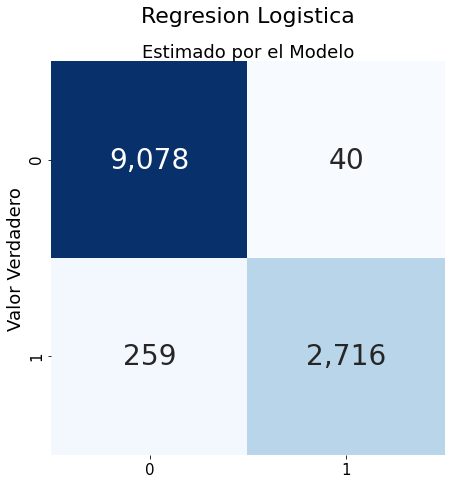

In [130]:
scores(ytest, y_pred_log_sin_grid, "Regresion Logistica")

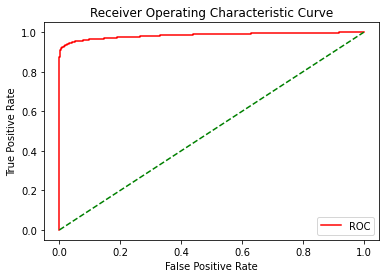

0.9542771247564611


In [131]:
y_pred_proba_log= pipe_logistica2.predict_proba(Xtest)

prob = y_pred_proba_log[:, 1]
fper, tper, thresholds= roc_curve(ytest, prob)

plot_roc_curve(fper, tper)
print(roc_auc_score(ytest, y_pred_log_sin_grid))

In [132]:
feature_importance = pd.DataFrame(zip(X.columns, pipe_logistica2[1].coef_.flatten(), ))
feature_importance.rename(columns= {0 : "features",
                                   1: "coeficientes"}, inplace= True)

In [133]:
feature_importance["coeficientes"]= feature_importance["coeficientes"]**2

In [134]:
feature_importance.sort_values(by= ["coeficientes"], ascending= False).head(15)

features  coeficientes
33                 issued     43.522647
129   paymentsCardType_VI      5.343436
124   paymentsCardType_CA      5.240453
12              cancelled      3.917489
23                eaScore      2.945608
22           eaRiskBandId      1.530958
21             eaReasonId      1.458221
39           lagTimeHours      1.237273
40   online_airport_state      1.216392
20             eaAdviceId      0.983247
34    julixHasNegativeHit      0.713213
123   paymentsCardType_AX      0.517865
49        online_ip_state      0.500358
28    eulerAllSearchCount      0.397081
127   paymentsCardType_HC      0.319514

#### Dió muy buenos numeros!!
#### Probemos ahora con el dataset balanceado

In [135]:
pipe_log_3 = pipe_logistica

In [136]:
pipe_log_3.fit(X_Train_Under, y_train_under)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Logistica', LogisticRegressionCV())])

In [137]:
y_pred_log_3 =pipe_log_3.predict(Xtest)


accuracy_score =  0.968328785247664
precision_score =  0.939322033898305
recall_score =  0.9314285714285714
f1_score =  0.9353586497890295
mean_squared_error =  0.031671214752336065



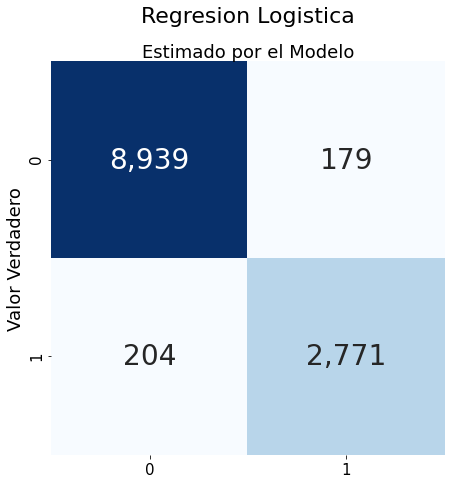

In [138]:
scores(ytest, y_pred_log_3, "Regresion Logistica")

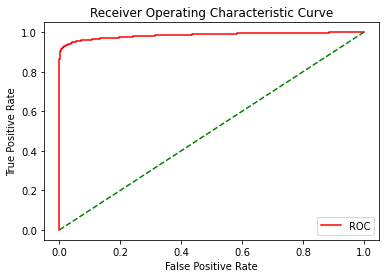

0.9558985366465077


In [139]:
prob = pipe_log_3.predict_proba(Xtest)[:, 1]
fper, tper, thresholds= roc_curve(ytest, prob)

plot_roc_curve(fper, tper)
print(roc_auc_score(ytest, y_pred_log_3))

---------------------------------------------------------------------------------------------------------------------------

# C. BernoulliNB

In [140]:
from sklearn.naive_bayes import BernoulliNB

modelo_bernoulli= BernoulliNB()

modelo_bernoulli.fit(Xtrain, ytrain)

y_modelo_pred_b = modelo_bernoulli.predict(Xtest)


accuracy_score =  0.9483999007690399
precision_score =  0.8940663761314114
recall_score =  0.8964705882352941
f1_score =  0.8952668680765358
mean_squared_error =  0.05160009923096006



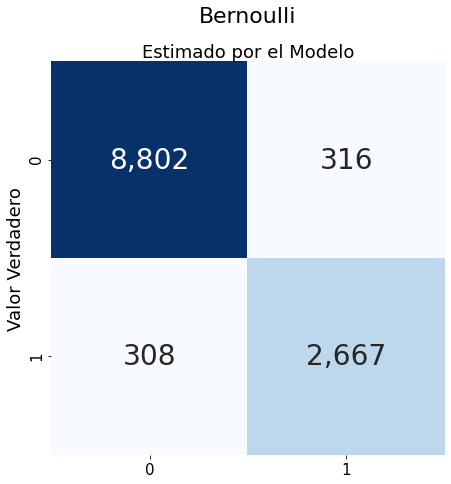

In [141]:
scores(ytest, y_modelo_pred_b, "Bernoulli")

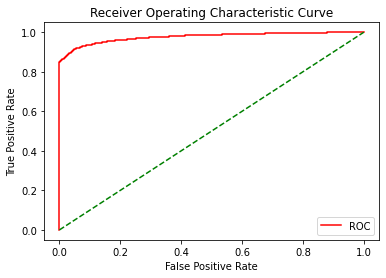

0.9558985366465077


In [142]:
prob = modelo_bernoulli.predict_proba(Xtest)[:, 1]
fper, tper, thresholds= roc_curve(ytest, prob)

plot_roc_curve(fper, tper)
print(roc_auc_score(ytest, y_pred_log_3))

------------------------------------------------------------------------------------------

# D. Decision Tree Classifier

In [143]:
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, random_state=1)

[Text(376.65000000000003, 761.04, 'hours_since_first_verification <= 0.5\ngini = 0.37\nsamples = 28215\nvalue = [21305, 6910]'),
 Text(251.10000000000002, 543.6, 'gini = 0.0\nsamples = 5834\nvalue = [0, 5834]'),
 Text(502.20000000000005, 543.6, 'ReasonCode <= 333.24\ngini = 0.092\nsamples = 22381\nvalue = [21305, 1076]'),
 Text(251.10000000000002, 326.15999999999997, 'julixTrueIpScore <= 61.5\ngini = 0.047\nsamples = 20115\nvalue = [19631, 484]'),
 Text(125.55000000000001, 108.72000000000003, 'gini = 0.157\nsamples = 2184\nvalue = [1996, 188]'),
 Text(376.65000000000003, 108.72000000000003, 'gini = 0.032\nsamples = 17931\nvalue = [17635, 296]'),
 Text(753.3000000000001, 326.15999999999997, 'paymentsInstallments <= 27.8\ngini = 0.386\nsamples = 2266\nvalue = [1674, 592]'),
 Text(627.75, 108.72000000000003, 'gini = 0.272\nsamples = 1652\nvalue = [1384, 268]'),
 Text(878.8500000000001, 108.72000000000003, 'gini = 0.498\nsamples = 614\nvalue = [290, 324]')]

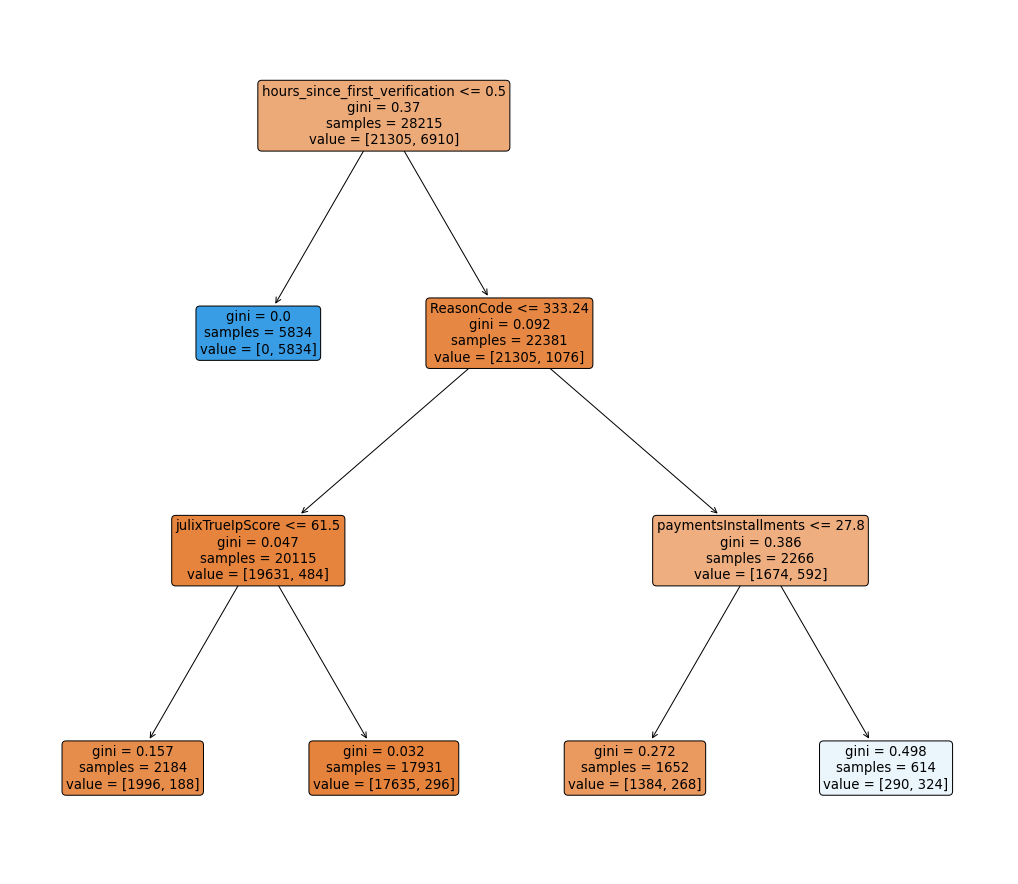

In [144]:
from sklearn import tree
fig, axes = plt.subplots(figsize=(18,16))
tree.plot_tree(treeclf, feature_names= df_mergeado.columns, filled= True, rounded= True, ax= axes)

#Esta reducido a 3 nodos a modo de prueba

In [145]:
y_pred_treeclf= treeclf.predict(Xtest)


accuracy_score =  0.9650210865790126
precision_score =  0.9636627906976745
recall_score =  0.8914285714285715
f1_score =  0.92613933996857
mean_squared_error =  0.03497891342098735



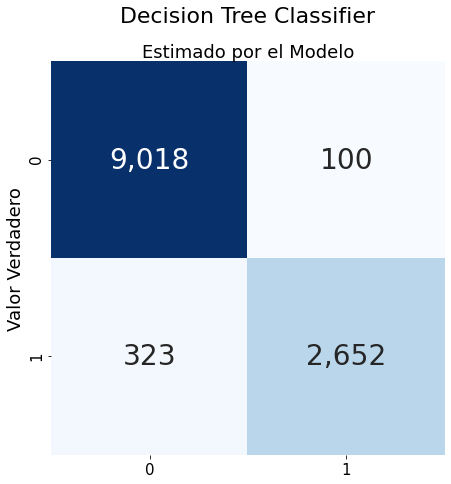

In [146]:
scores(ytest, y_pred_treeclf, "Decision Tree Classifier")

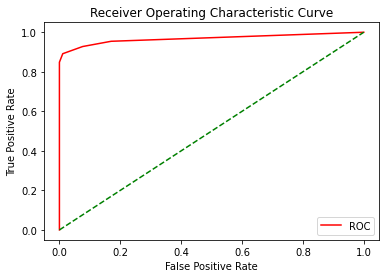

0.9402306270172031


In [147]:
prob = treeclf.predict_proba(Xtest)[:, 1]
fper, tper, thresholds= roc_curve(ytest, prob)

plot_roc_curve(fper, tper)
print(roc_auc_score(ytest, y_pred_treeclf))

In [148]:
pd.DataFrame({'Atributo':Xtrain.columns,
              'importancia':treeclf.feature_importances_}).sort_values('importancia',
                                                                      ascending=False).head(5)

Atributo  importancia
33                     issued     0.958013
10                 ReasonCode     0.026176
55         speed_to_departure     0.013658
39               lagTimeHours     0.002153
86  eulerSearchUrgency_URGENT     0.000000

In [149]:
alpha_range = np.arange(0.0, 5.1, 1)
max_depth_range = np.arange(1, 10, 2)
min_samples_split_range = np.arange(3, 11, 2)
param_grid_treeclf = dict(ccp_alpha = alpha_range, 
                 max_depth = max_depth_range,
                 min_samples_split = min_samples_split_range)

In [150]:
treeclf_grid= DecisionTreeClassifier()

In [151]:
Grid_DecisionTreeClassifier= GridSearchCV(treeclf_grid, param_grid_treeclf, cv= Fold, scoring = "neg_mean_squared_error", n_jobs= -1)

In [152]:
Grid_DecisionTreeClassifier.fit(Xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': array([0., 1., 2., 3., 4., 5.]),
                         'max_depth': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([3, 5, 7, 9])},
             scoring='neg_mean_squared_error')

In [153]:
Grid_DecisionTreeClassifier.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_split=7)

In [154]:
#Generemos un nuevo DecisionTreeClassifier con los parametros obtenidos en el grid search

best_treeclf = DecisionTreeClassifier(max_depth=9, min_samples_split=9)

best_treeclf.fit(Xtrain, ytrain)

y_best_treeclf_predict = best_treeclf.predict(Xtest)


accuracy_score =  0.9705614818490036
precision_score =  0.9735985533453888
recall_score =  0.9048739495798319
f1_score =  0.9379790940766551
mean_squared_error =  0.029438518150996445



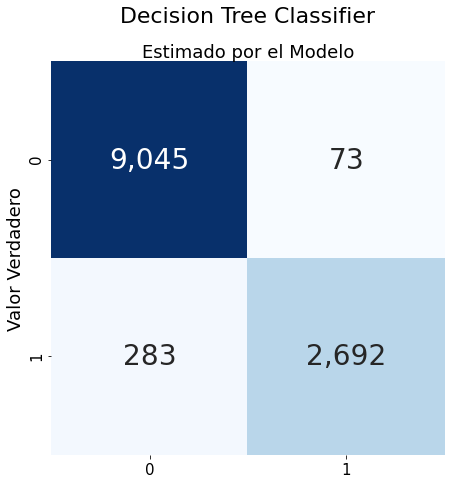

In [155]:
scores(ytest, y_best_treeclf_predict, "Decision Tree Classifier")

In [156]:
pd.DataFrame({'Atributo':Xtrain.columns,
              'importancia':best_treeclf.feature_importances_}).sort_values('importancia',
                                                                      ascending=False).head(15)

Atributo  importancia
33                           issued     0.889419
10                       ReasonCode     0.024302
55               speed_to_departure     0.014678
23                          eaScore     0.007118
34              julixHasNegativeHit     0.007115
28              eulerAllSearchCount     0.004245
32   hours_since_first_verification     0.004218
39                     lagTimeHours     0.003530
130                             Mes     0.003191
31         eulerlastSessionTimeSecs     0.003190
69              channel_site-tablet     0.003182
56                   totalUsdAmount     0.002812
40             online_airport_state     0.002585
50                      online_name     0.002433
57             triangulation_height     0.001924

------------------------------------------------------------------------------------------------------------------

# E. Random Forest Classifier

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
model_rfc = RandomForestClassifier()

In [159]:
model_rfc.fit(Xtrain, ytrain)

RandomForestClassifier()

In [160]:
y_pred_rfc = model_rfc.predict(Xtest)


accuracy_score =  0.9765980319192922
precision_score =  0.9937637564196625
recall_score =  0.9105882352941177
f1_score =  0.9503595860375373
mean_squared_error =  0.02340196808070785



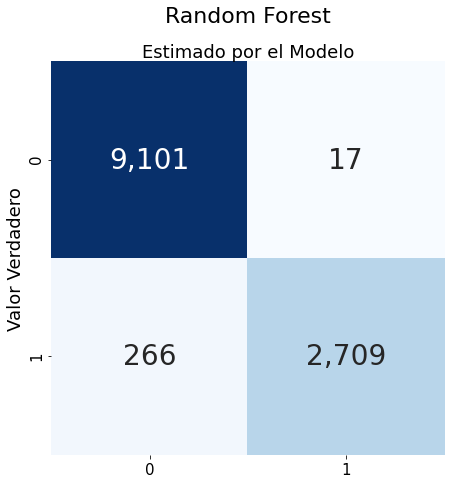

In [161]:
scores(ytest, y_pred_rfc, "Random Forest")

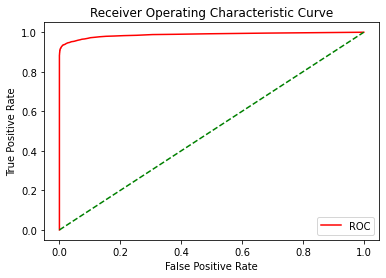

0.9543618956685548


In [162]:
prob = model_rfc.predict_proba(Xtest)[:, 1]
fper, tper, thresholds= roc_curve(ytest, prob)

plot_roc_curve(fper, tper)
print(roc_auc_score(ytest, y_pred_rfc))

In [163]:
pd.DataFrame({'Atributo':Xtrain.columns,
              'importancia':model_rfc.feature_importances_}).sort_values('importancia',
                                                                      ascending=False).head(15)

Atributo  importancia
33                          issued     0.263016
12                       cancelled     0.205466
10                      ReasonCode     0.066570
34             julixHasNegativeHit     0.048157
23                         eaScore     0.040027
55              speed_to_departure     0.037083
39                    lagTimeHours     0.032215
22                    eaRiskBandId     0.024886
58      triangulation_height_speed     0.019290
0                         AfsScore     0.019250
21                      eaReasonId     0.017072
32  hours_since_first_verification     0.010480
20                      eaAdviceId     0.009470
40            online_airport_state     0.009014
56                  totalUsdAmount     0.008627

In [164]:
param_trees = {'n_estimators': [50, 400, 800], 
               'max_features': [5, 10, 15,], 
               'max_depth': [5, 20, 50, 100], 
               'min_samples_leaf':[2, 5, 10, 50]}

In [165]:
grid_model_rfc= RandomForestClassifier()

Grid_model_rfc= GridSearchCV(grid_model_rfc, param_trees, cv= Fold, scoring = "neg_mean_squared_error", n_jobs= -1)

In [166]:
Grid_model_rfc.fit(Xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 20, 50, 100],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': [2, 5, 10, 50],
                         'n_estimators': [50, 400, 800]},
             scoring='neg_mean_squared_error')

In [167]:
Grid_model_rfc.best_params_

{'max_depth': 100,
 'max_features': 5,
 'min_samples_leaf': 2,
 'n_estimators': 400}

In [168]:
#Probemos con los parametros que nos dio el grid search

best_rfc = RandomForestClassifier(max_depth=50, max_features=5, min_samples_leaf=2,
                       n_estimators=400)

best_rfc.fit(Xtrain, ytrain)

y_predict_best_rfc = best_rfc.predict(Xtest)


accuracy_score =  0.9770941867195898
precision_score =  0.9930555555555556
recall_score =  0.9132773109243697
f1_score =  0.9514971108387322
mean_squared_error =  0.022905813280410154



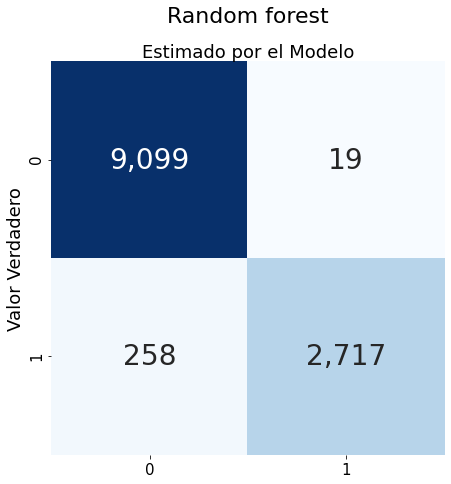

In [169]:
scores(ytest, y_predict_best_rfc, "Random forest")

In [170]:
pd.DataFrame({'Atributo':Xtrain.columns,
              'importancia':best_rfc.feature_importances_}).sort_values('importancia',
                                                                      ascending=False).head(15)

Atributo  importancia
12                       cancelled     0.184191
33                          issued     0.169708
10                      ReasonCode     0.069229
34             julixHasNegativeHit     0.052702
39                    lagTimeHours     0.036430
23                         eaScore     0.033487
55              speed_to_departure     0.030983
0                         AfsScore     0.026925
21                      eaReasonId     0.025240
22                    eaRiskBandId     0.024096
58      triangulation_height_speed     0.023503
32  hours_since_first_verification     0.015673
20                      eaAdviceId     0.014186
40            online_airport_state     0.011612
56                  totalUsdAmount     0.011447

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

# F. Extra Trees Classifier

In [171]:
from sklearn.ensemble import ExtraTreesClassifier

model_ETC= ExtraTreesClassifier(n_estimators = 1000,
                                 max_depth = 5, 
                                 bootstrap = True,  
                                 random_state = 171,
                                 max_samples = 0.3)

In [172]:
model_ETC.fit(Xtrain, ytrain)

ExtraTreesClassifier(bootstrap=True, max_depth=5, max_samples=0.3,
                     n_estimators=1000, random_state=171)

In [173]:
y_pred_ETC = model_ETC.predict(Xtest)


accuracy_score =  0.9649383941122963
precision_score =  0.9984368894099257
recall_score =  0.8588235294117647
f1_score =  0.9233827249728948
mean_squared_error =  0.03506160588770363



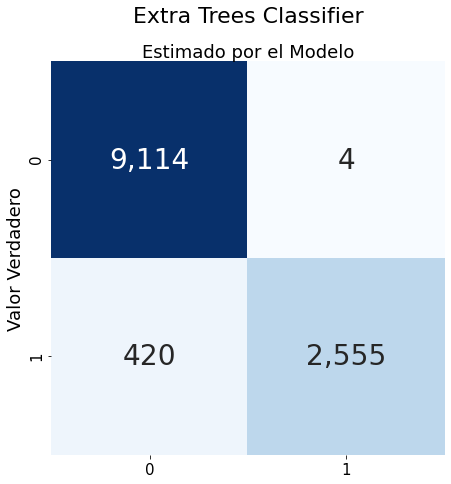

In [174]:
scores(ytest, y_pred_ETC, "Extra Trees Classifier")

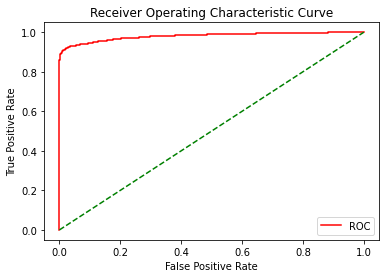

0.929192418357999


In [175]:
prob = model_ETC.predict_proba(Xtest)[:, 1]
fper, tper, thresholds= roc_curve(ytest, prob)

plot_roc_curve(fper, tper)
print(roc_auc_score(ytest, y_pred_ETC))

In [176]:
pd.DataFrame({'Atributo':Xtrain.columns,
              'importancia':model_ETC.feature_importances_}).sort_values('importancia',
                                                                      ascending=False).head(15)

Atributo  importancia
33                      issued     0.260792
12                   cancelled     0.260418
10                  ReasonCode     0.126697
34         julixHasNegativeHit     0.101235
23                     eaScore     0.040854
22                eaRiskBandId     0.035093
0                     AfsScore     0.029134
82  eulerBuyTripType_ROUNDTRIP     0.016644
81     eulerBuyTripType_ONEWAY     0.012540
40        online_airport_state     0.009866
50                 online_name     0.008627
44                  online_ddd     0.007236
39                lagTimeHours     0.005494
37      julixPositiveUserLevel     0.005252
55          speed_to_departure     0.004713

In [177]:
param_grid_extraa_trees={
        'n_estimators': range(50,126,25),
        'max_features': range(50,401,50),
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
    }

In [178]:
model_ETC_toGrid= ExtraTreesClassifier()

In [179]:
Grid_ETC = GridSearchCV(model_ETC_toGrid, param_grid_extraa_trees, n_jobs= -1, cv= Fold, scoring = "neg_mean_squared_error")

In [180]:
Grid_ETC.fit(Xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
             estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_features': range(50, 401, 50),
                         'min_samples_leaf': range(20, 50, 5),
                         'min_samples_split': range(15, 36, 5),
                         'n_estimators': range(50, 126, 25)},
             scoring='neg_mean_squared_error')

In [181]:
Best_ETC= ExtraTreesClassifier(max_features=100, min_samples_leaf=20,
                     min_samples_split=15)


Best_ETC.fit(Xtrain, ytrain)

y_pred_BestETC= Best_ETC.predict(Xtest)


accuracy_score =  0.9743653353179526
precision_score =  0.993701370878103
recall_score =  0.9015126050420168
f1_score =  0.9453648219950651
mean_squared_error =  0.025634664682047465



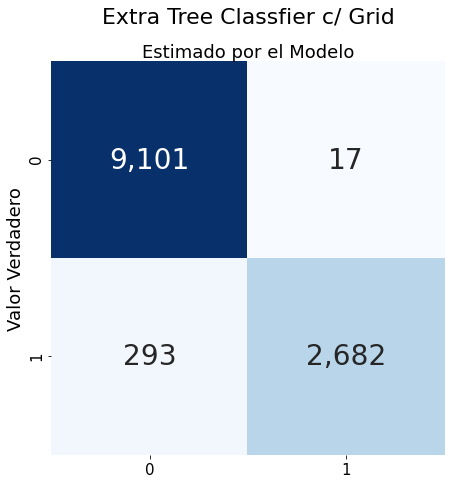

In [182]:
scores(ytest, y_pred_BestETC, "Extra Tree Classfier c/ Grid")

-------------------------------------------------------------------------------------------------------------------

# G. AdaBoost Classifier

In [183]:
from sklearn.ensemble import AdaBoostClassifier

modelo_base = DecisionTreeClassifier()
model_ABC = AdaBoostClassifier(base_estimator= modelo_base, n_estimators=500,random_state=1)

In [184]:
model_ABC.fit(Xtrain, ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                   random_state=1)

In [185]:
y_pred_ABC = model_ABC.predict(Xtest)


accuracy_score =  0.9574133796411147
precision_score =  0.9108216432865731
recall_score =  0.9166386554621849
f1_score =  0.9137208912715697
mean_squared_error =  0.04258662035888531



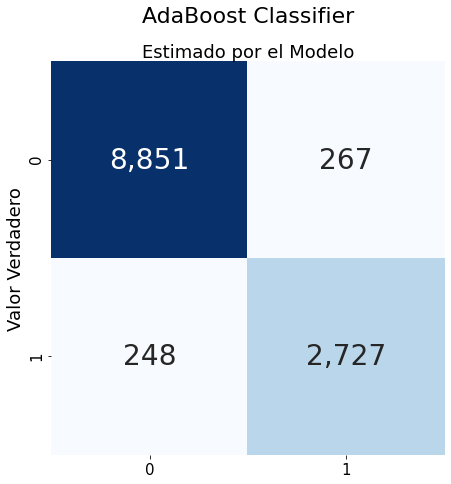

In [186]:
scores(ytest, y_pred_ABC, "AdaBoost Classifier")

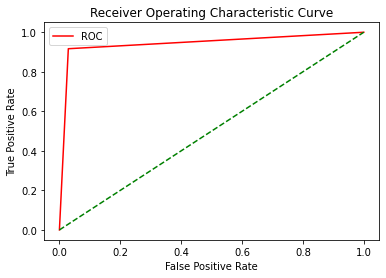

0.9436779590098816


In [187]:
prob = model_ABC.predict_proba(Xtest)[:, 1]
fper, tper, thresholds= roc_curve(ytest, prob)

plot_roc_curve(fper, tper)
print(roc_auc_score(ytest, y_pred_ABC))

In [188]:
pd.DataFrame({'Atributo':Xtrain.columns,
              'importancia':model_ABC.feature_importances_}).sort_values('importancia',
                                                                      ascending=False).head(15)

Atributo  importancia
33                           issued     0.803693
10                       ReasonCode     0.022019
55               speed_to_departure     0.015742
23                          eaScore     0.008279
32   hours_since_first_verification     0.007873
39                     lagTimeHours     0.007608
34              julixHasNegativeHit     0.006611
56                   totalUsdAmount     0.006590
31         eulerlastSessionTimeSecs     0.005236
130                             Mes     0.005092
0                          AfsScore     0.004600
28              eulerAllSearchCount     0.004564
18              distance_to_arrival     0.004410
57             triangulation_height     0.004372
11                       TimeOnPage     0.003956

In [189]:
ABC_to_Grid= AdaBoostClassifier(base_estimator= modelo_base)

In [190]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [191]:
grid_search_ABC = GridSearchCV(ABC_to_Grid, grid, n_jobs=-1, cv=Fold, scoring='neg_mean_squared_error')

In [192]:
grid_search_ABC.fit(Xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error')

In [193]:
grid_search_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.001)

In [194]:
y_grid_predict = grid_search_ABC.predict(Xtest)


accuracy_score =  0.9568345323741008
precision_score =  0.9059913935782853
recall_score =  0.92
f1_score =  0.9129419613075385
mean_squared_error =  0.04316546762589928



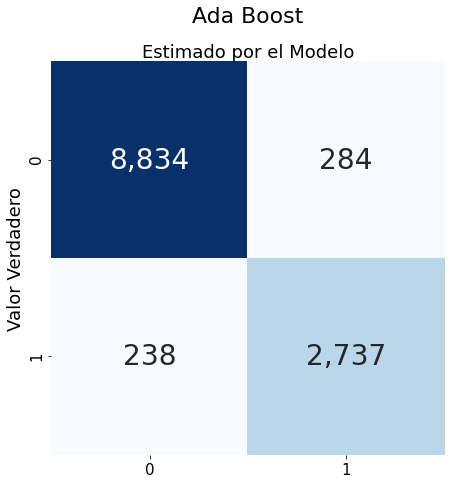

In [195]:
scores(ytest, y_grid_predict, "Ada Boost")

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# H. XG BOOST

In [196]:
import xgboost

In [197]:
XGB = xgboost.XGBClassifier()

In [198]:
X_trainXGB = pd.to_numeric(Xtrain.Mes)
X_Test_XGB = pd.to_numeric(Xtest.Mes)

In [199]:
XGB.fit(np.vstack(X_trainXGB), ytrain)

[19:55:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [200]:
y_pred_XGB= XGB.predict(np.vstack(X_Test_XGB))


accuracy_score =  0.7539899115190606
precision_score =  0.0
recall_score =  0.0
f1_score =  0.0
mean_squared_error =  0.2460100884809394



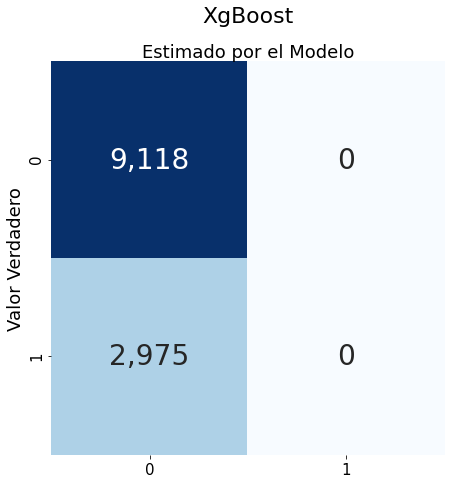

In [201]:
scores(ytest, y_pred_XGB, "XgBoost")

-------------------------------------------------------------------------------------------------------------------------

# 5. CONCLUSIONES
#### En este apartado vamos a visualizar las features que mas importancia tuvieron en los modelos y como se relacionan con la variable target!

# 1. Issued

In [202]:
df.fraud.value_counts()

0.0    30423
1.0     9885
Name: fraud, dtype: int64

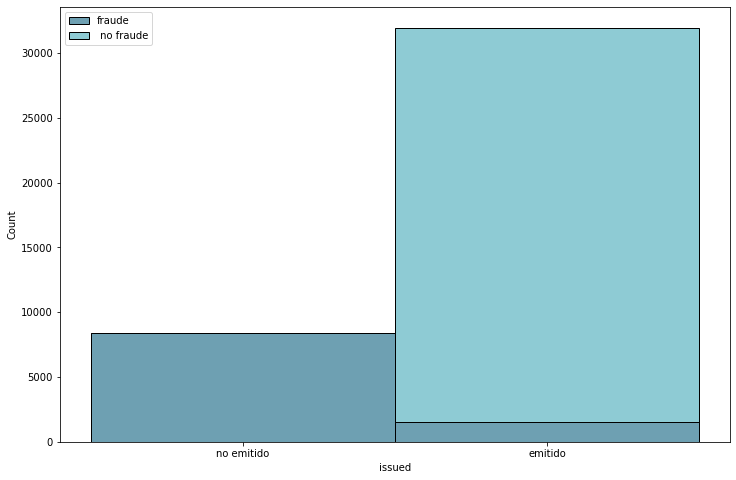

In [203]:
fig, ax= plt.subplots(figsize= (12,8))
sns.histplot(data= df, x=df.issued.replace([1,0], ["emitido", "no emitido"]), hue= df.fraud, multiple= "stack", ax= ax, palette="GnBu_d")
ax.legend(['fraude', ' no fraude'])

------------------------------------------------------------------------------------------------------

# 2. Cancelled

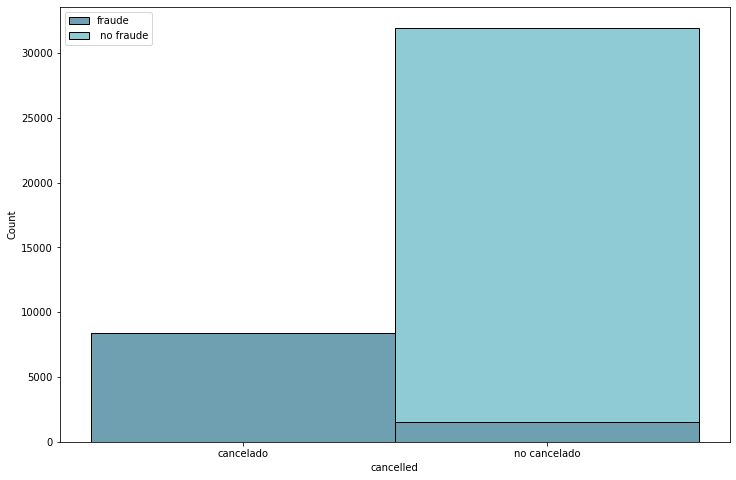

In [204]:
fig, ax= plt.subplots(figsize= (12,8))
sns.histplot(data= df, x=df.cancelled.replace([1,0], ["cancelado", "no cancelado"]), hue= df.fraud, multiple= "stack", ax= ax, palette="GnBu_d")
ax.legend(['fraude', ' no fraude'])

------------------------------------------------------------------------------------------------------

# 3. Reason Code

### Un  código de transaccion "Reason Code"  es una respuesta de los servidores CyberSource para las transacciones de producción enviadas mediante los siguientes métodos:
#### API de pedido simple
#### Terminal virtual
#### Aceptación segura: pago alojado
#### Aceptación segura: API de pago
#### API del kit de herramientas SOAP
#### Envío de archivos de transacciones sin conexión

## En nuestro dataset se presentan 4 codigos de transaccion:


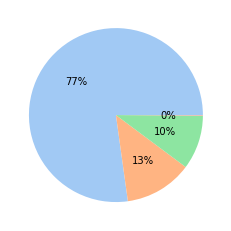

<Figure size 1440x720 with 0 Axes>

In [205]:
colors= sns.color_palette('pastel')[0:5]

plt.pie(df.ReasonCode.value_counts(), colors= colors, autopct='%.0f%%')
plt.figure(figsize= (20,10))
plt.show()


#### 100: Transacción exitosa
#### 480: El pedido está marcado para revisión
#### 481: La orden ha sido rechazada
#### 231: número de cuenta no válido

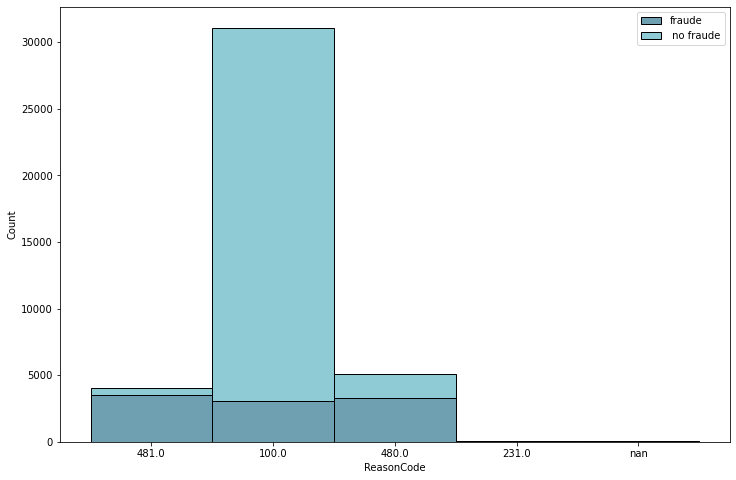

In [206]:
fig, ax= plt.subplots(figsize= (12,8))
sns.histplot(data= df, x=df.ReasonCode.astype(str), hue= df.fraud, multiple= "stack", ax= ax, palette="GnBu_d")
ax.legend(['fraude', ' no fraude'])

### ¡Casi 1/3 de los casos de fraude provienen de transacciones exitosas!

#### veamos relacion entre el codigo de transaccion, la emisison y el fraude!!

In [207]:
pd.DataFrame(df.groupby(["ReasonCode", "issued"])["fraud"].value_counts())

fraud
ReasonCode issued fraud       
100.0      0      1.0     2370
           1      0.0    28022
                  1.0      695
231.0      0      1.0       42
480.0      0      1.0     2757
           1      0.0     1786
                  1.0      536
481.0      0      1.0     3184
           1      0.0      584
                  1.0      292

------------------------------------------------------------------------------------------------------

# 4. AfsScore

#### AFS es  el nivel de riesgo asociado con cada transacción y puede ir del 0 al 99 siendo 99 el pedido mas riesgoso

<AxesSubplot:xlabel='AfsScore', ylabel='Density'>

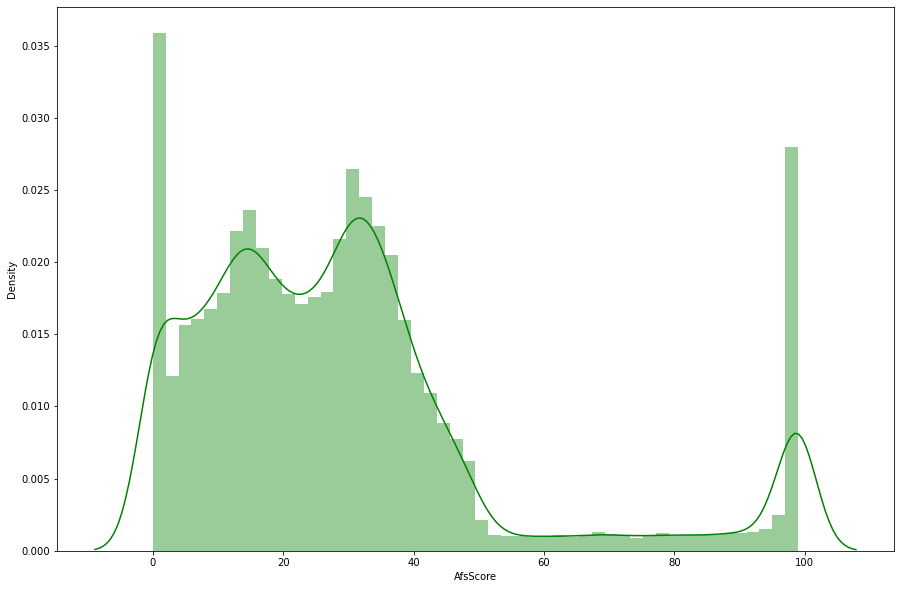

In [208]:
fig, ax= plt.subplots(figsize= (15,10))
sns.distplot(df_mergeado.AfsScore, color= "green", label= "Afs Score", ax= ax)

<AxesSubplot:xlabel='fraud', ylabel='AfsScore'>

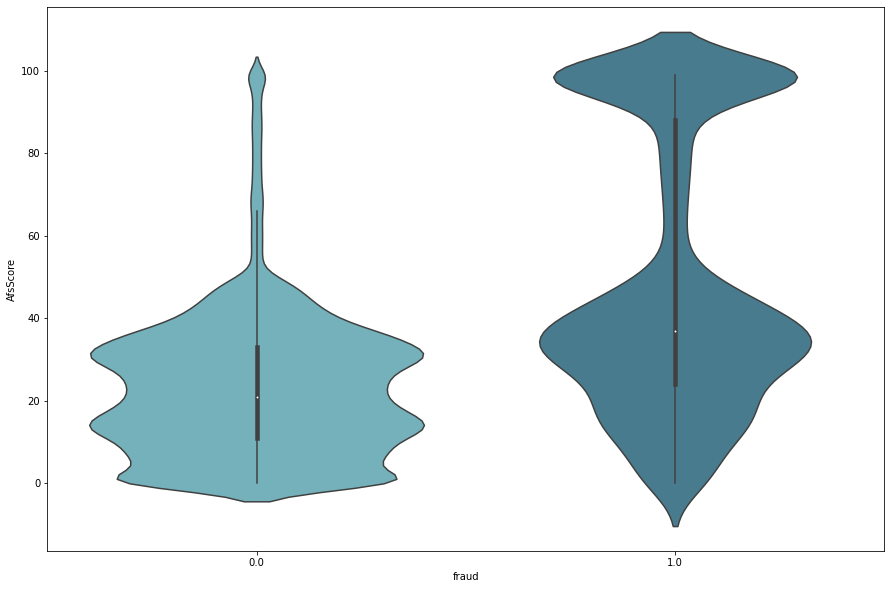

In [209]:
fig, ax= plt.subplots(figsize= (15,10))
sns.violinplot(x= df.fraud, y=df_mergeado.AfsScore, data= df, ax= ax, palette="GnBu_d")

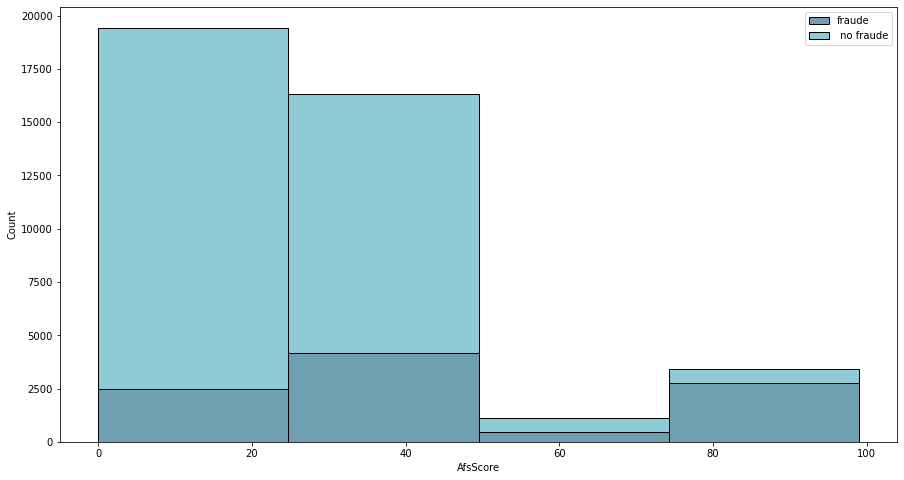

In [210]:
fig, ax= plt.subplots(figsize= (15,8))
sns.histplot(data= df, x=df_mergeado.AfsScore, hue= df_mergeado.fraud, multiple= "stack", ax= ax, bins= 4, palette="GnBu_d")
ax.legend(['fraude', ' no fraude'])

------------------------------------------------------------------------------------------------------

# 5. Mes del caso

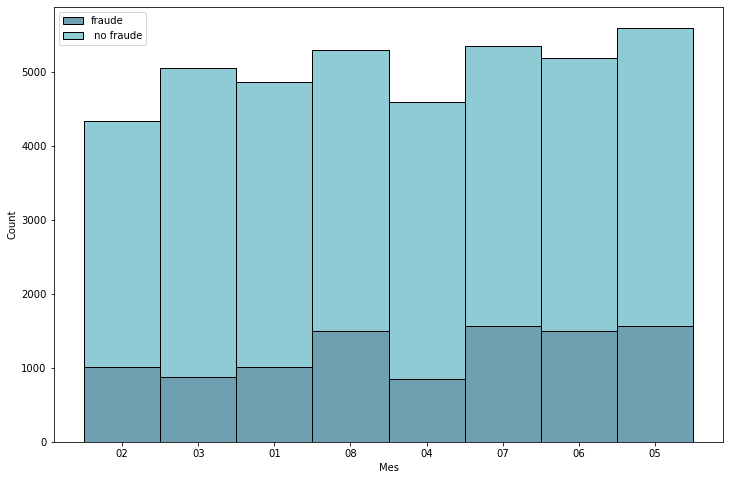

In [212]:
fig, ax= plt.subplots(figsize= (12,8))
sns.histplot(data= df, x=df_mergeado.Mes, hue= df.fraud, multiple= "stack", ax= ax, palette="GnBu_d")
ax.legend(['fraude', ' no fraude'])

In [ ]:
pd.DataFrame(df.groupby(["Mes","fraud"])["fraud"].count())

------------------------------------------------------------------------------------------------------

# 6.Tiempo de retraso

#### Veamos un histograma del tiempo de retraso que lleva cada caso

<AxesSubplot:xlabel='lagTimeHours', ylabel='Density'>

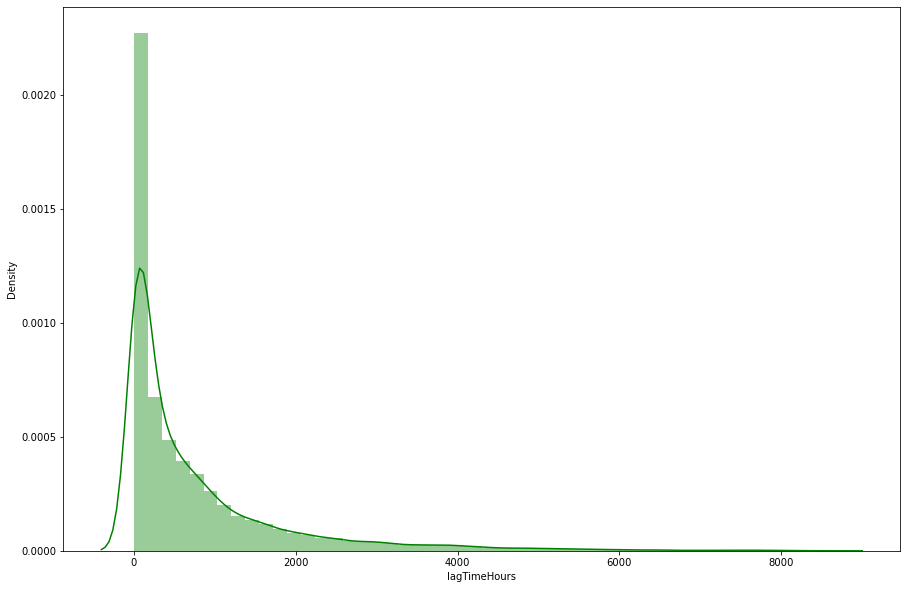

In [213]:
fig, ax= plt.subplots(figsize= (15,10))
sns.distplot(df_mergeado.lagTimeHours, color= "green", label= "Tiempo de retraso", ax= ax)

#### Veamos ahora como se relaciona con la target

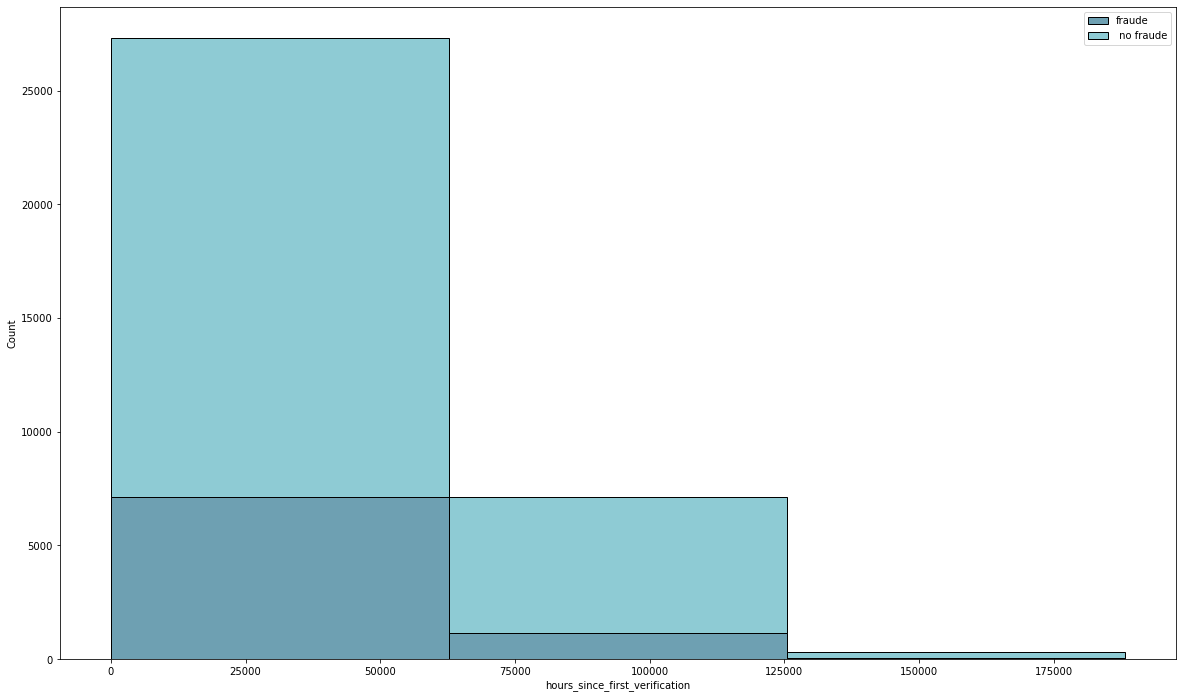

In [214]:
fig, ax= plt.subplots(figsize= (20,12))
sns.histplot(data= df, x=df.hours_since_first_verification	, hue= df.fraud, multiple= "stack", ax= ax, palette="GnBu_d", bins= 3)
ax.legend(['fraude', ' no fraude'])

------------------------------------------------------------------------------------------------------

# 7. Julix Has Negative Hit

#### No pudimos identificar que significa esta columna pero tiene una gran importancia en los algoritmos aplicados con respecto a la target

In [215]:
df.julixHasNegativeHit.value_counts()

0.0    36078
1.0     4204
Name: julixHasNegativeHit, dtype: int64

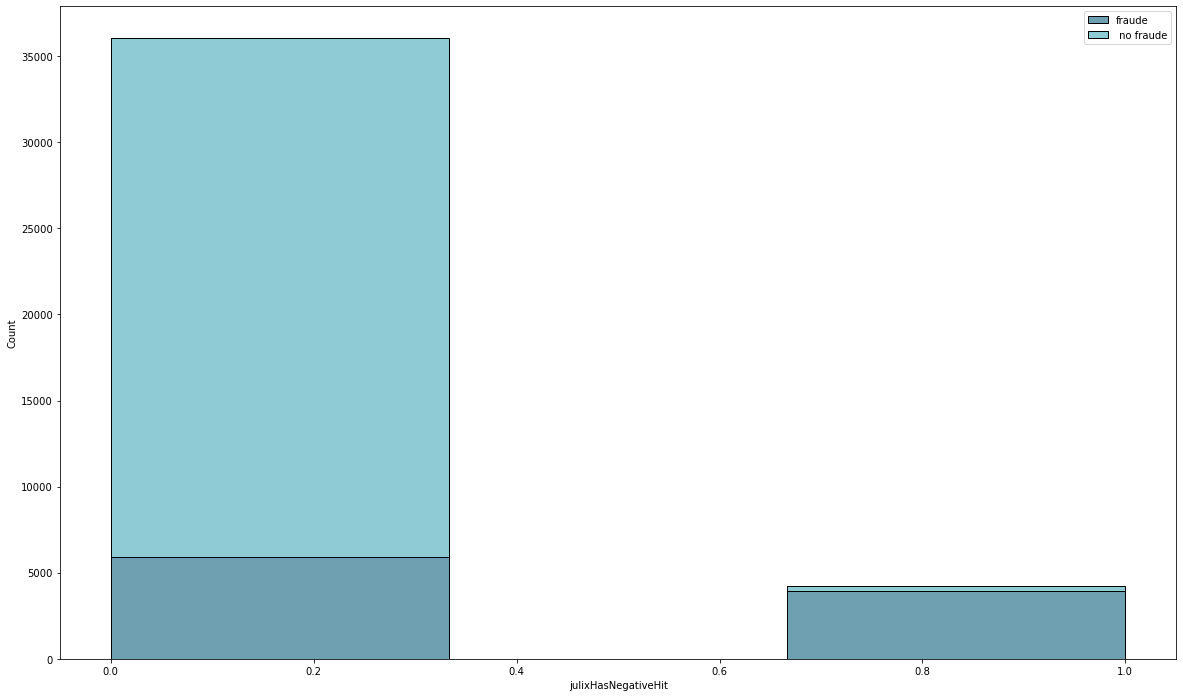

In [216]:
fig, ax= plt.subplots(figsize= (20,12))
sns.histplot(data= df, x= df.julixHasNegativeHit, hue= df.fraud, multiple= "stack", ax= ax, palette="GnBu_d", bins= 3)
ax.legend(['fraude', ' no fraude'])

#### Se puede observar a simple vista que cuando Julix Has Negative Hit es igual a 1 hay muchisimas probabilidades de que ocurra fraude

----------------------------------------------------------------------------------

# 8. ea Score

La gran mayoria de casos se concentran en la primer parte del grafico



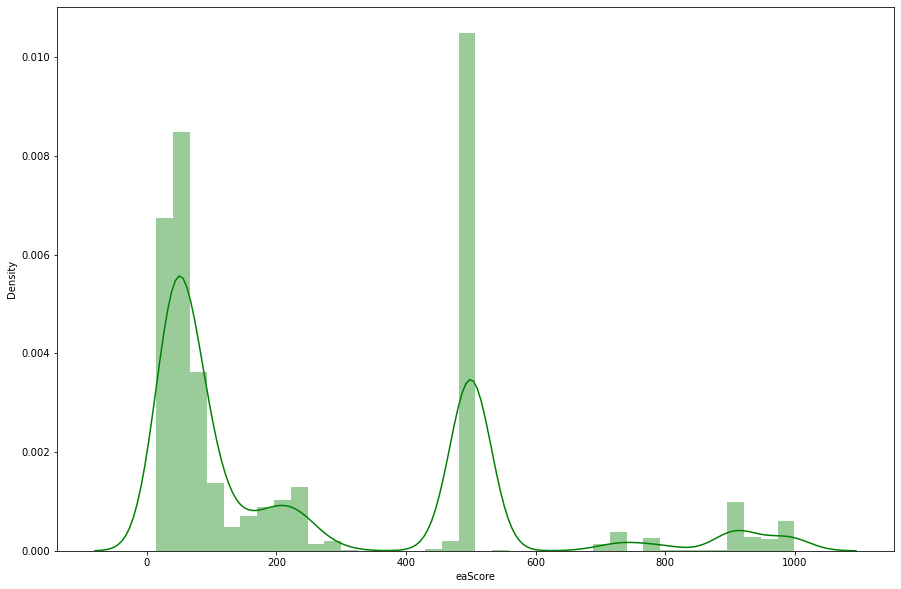

In [217]:
fig, ax= plt.subplots(figsize= (15,10))
sns.distplot(df_mergeado.eaScore, color= "green", label= "Tiempo de retraso", ax= ax)
print("La gran mayoria de casos se concentran en la primer parte del grafico")
print("")

#### Se pueden observar en el grafico como 3 especies de clusters, grafiquemos su relacion con la target en un histplot y pongamos bins = 3

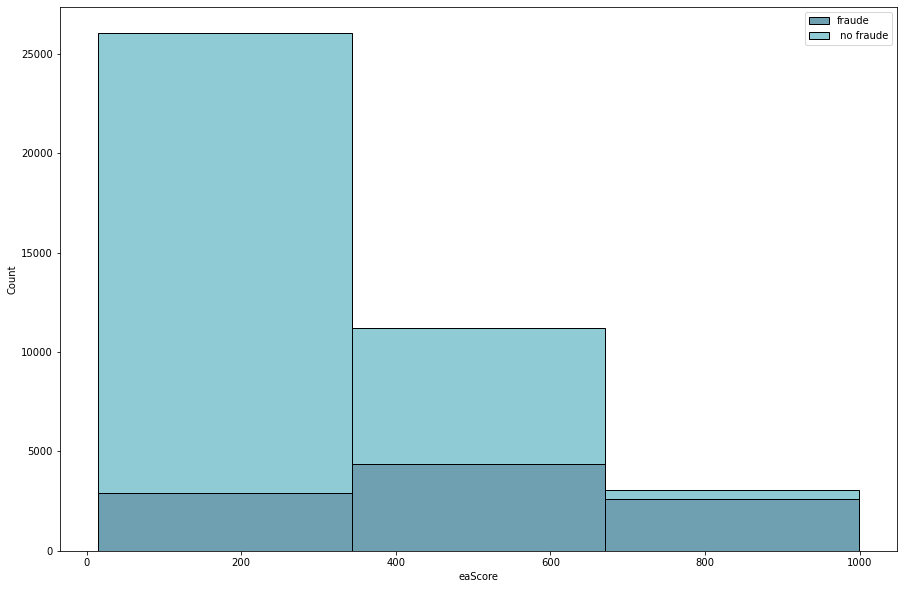

In [218]:
fig, ax= plt.subplots(figsize= (15,10))
sns.histplot(data= df, x=df.eaScore	, hue= df.fraud, multiple= "stack", ax= ax, palette="GnBu_d", bins= 3)
ax.legend(['fraude', ' no fraude'])

#### Se puede observar que a medida de que crece la variable Ea Score aumentan los casos de fraude

------------------------------------------------------------------------------------------------------

# 9. distance to departure

#### La distancia ortodrómica entre el aeropuerto de origen y el aeropuerto de destino

<AxesSubplot:xlabel='distance_to_departure', ylabel='Density'>

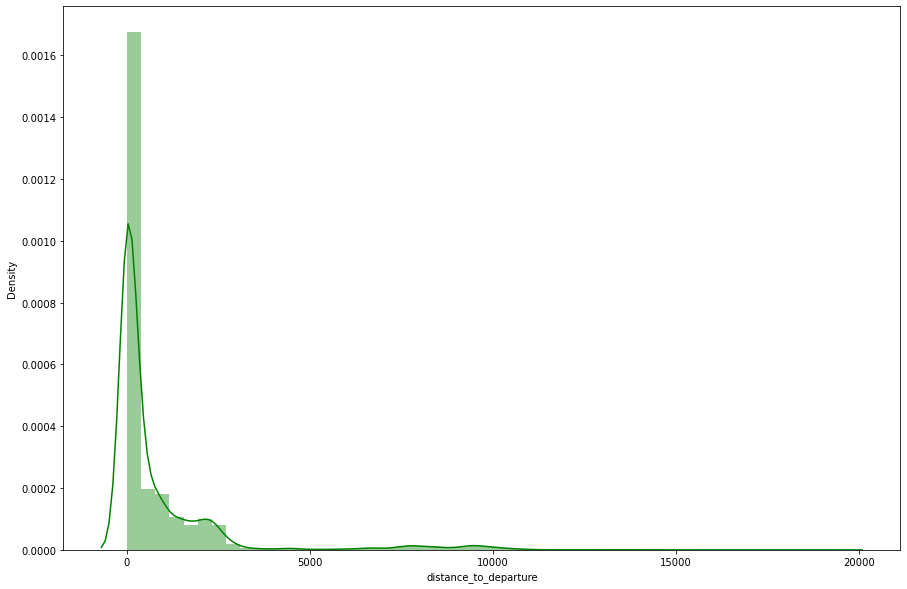

In [219]:
fig, ax= plt.subplots(figsize= (15,10))
sns.distplot(df_mergeado.distance_to_departure, color= "green", label= "Distancia hasta la salida", ax= ax)

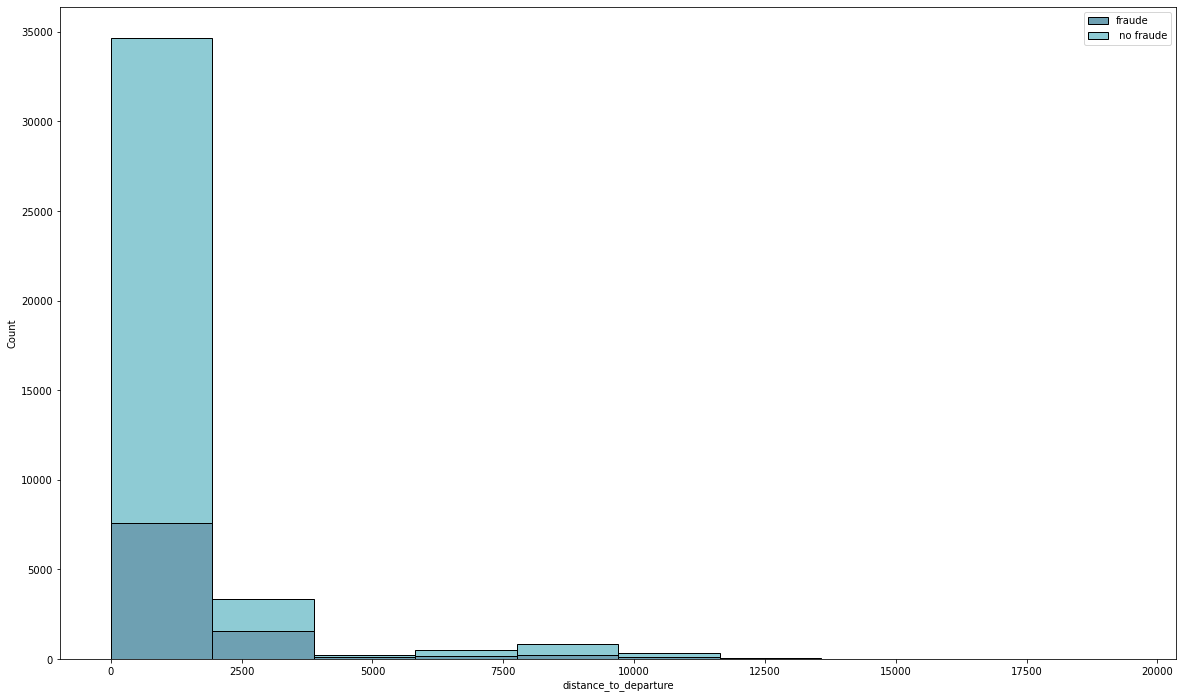

In [220]:
fig, ax= plt.subplots(figsize= (20,12))
sns.histplot(data= df, x=df.distance_to_departure	, hue= df.fraud, multiple= "stack", ax= ax, palette="GnBu_d", bins= 10)
ax.legend(['fraude', ' no fraude'])

#### Se puede notar una peculiaridad en el grafico y es que en los bins centrales hay mayor probabilidad de fraude que en los que se aleja del centro.

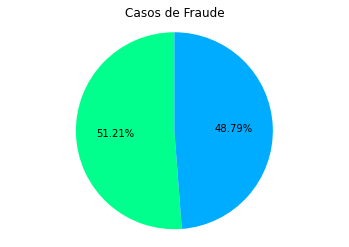

In [221]:
a = df_mergeado.loc[(df_mergeado.distance_to_departure > 2000) & (df_mergeado.distance_to_departure < 6000), "fraud"].value_counts(normalize = True)
section= a
colors= colors = ['#00FF8D', '#00ACFF']
fig = plt.pie(section, colors=colors,
        startangle=90,
        autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Casos de Fraude')
plt.show()

#### En este rango de distancia hay casi un 50% de que se produzca un fraude!!